# Test the HR prediction

### Test pipeline

In [1]:
from pipeline import pipeline
from pathlib import Path
import pandas as pd
from ppg import PPG

In [2]:
ppg = pipeline(
    Path("../data/P1LC3/P1LC3_ppg.csv"),
    Path("../data/P1LC3/P1LC3.csv"),
)

c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


Mixing Matrix
[[-54.36314567  -9.6384418  -46.35483436]
 [-65.15182222 -29.38007081  -3.64740191]
 [-40.54346289 -43.36893335 -33.9054159 ]]
Max Peak Source:  0
Max Peak Source:  0
PPG derived from Green_Source.


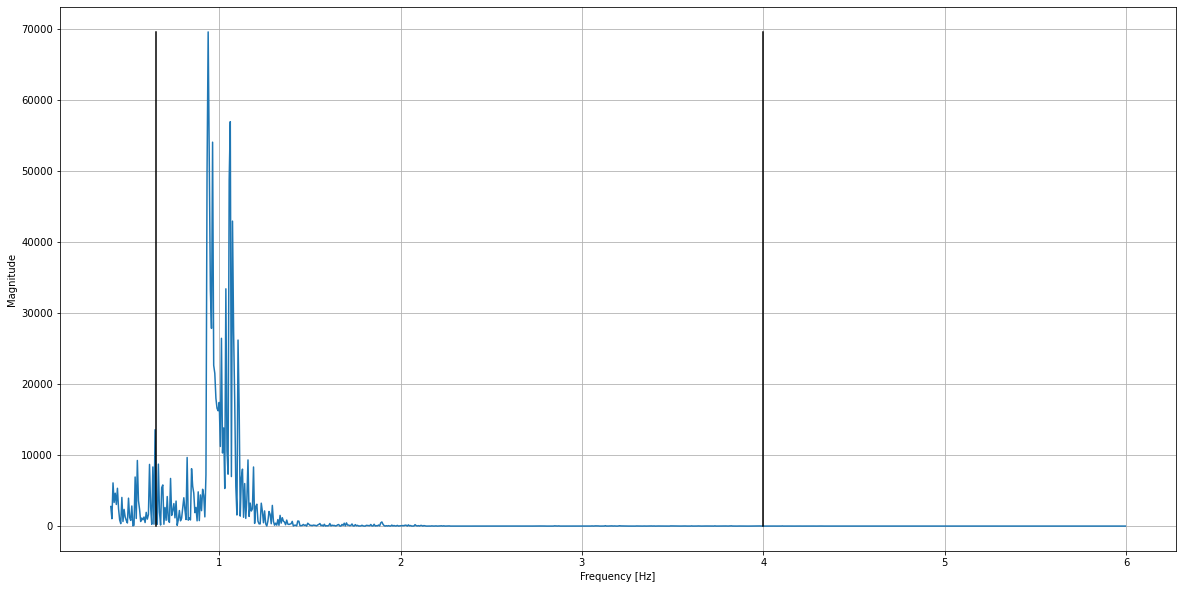

In [5]:
ppg.display_power_spectum()

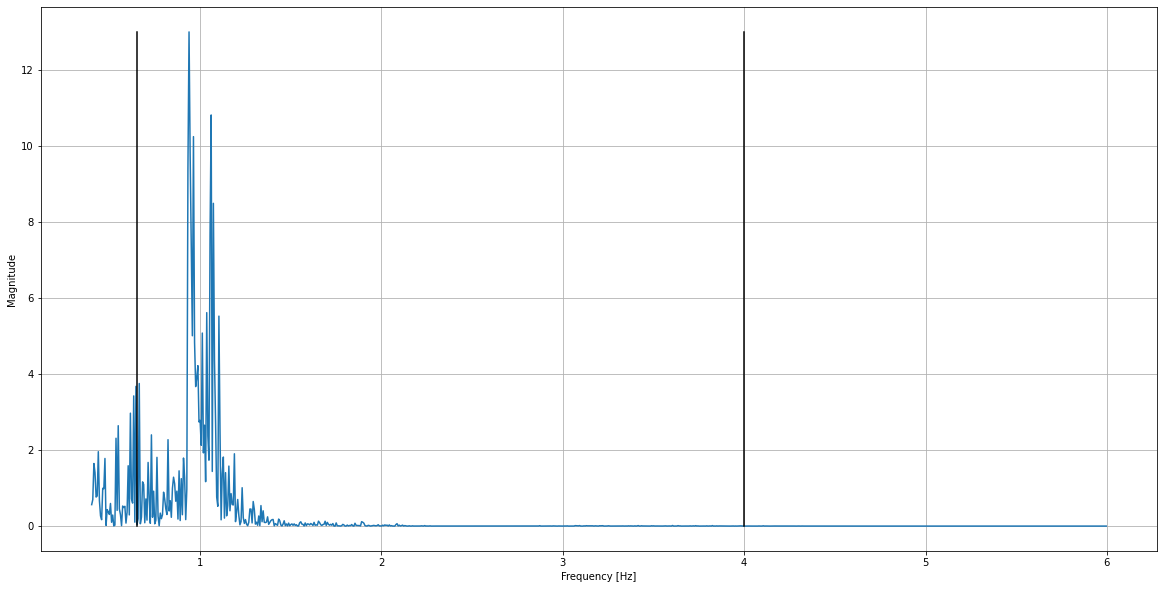

In [9]:
ppg.display_power_spectum(source='ICA_Best_Source')

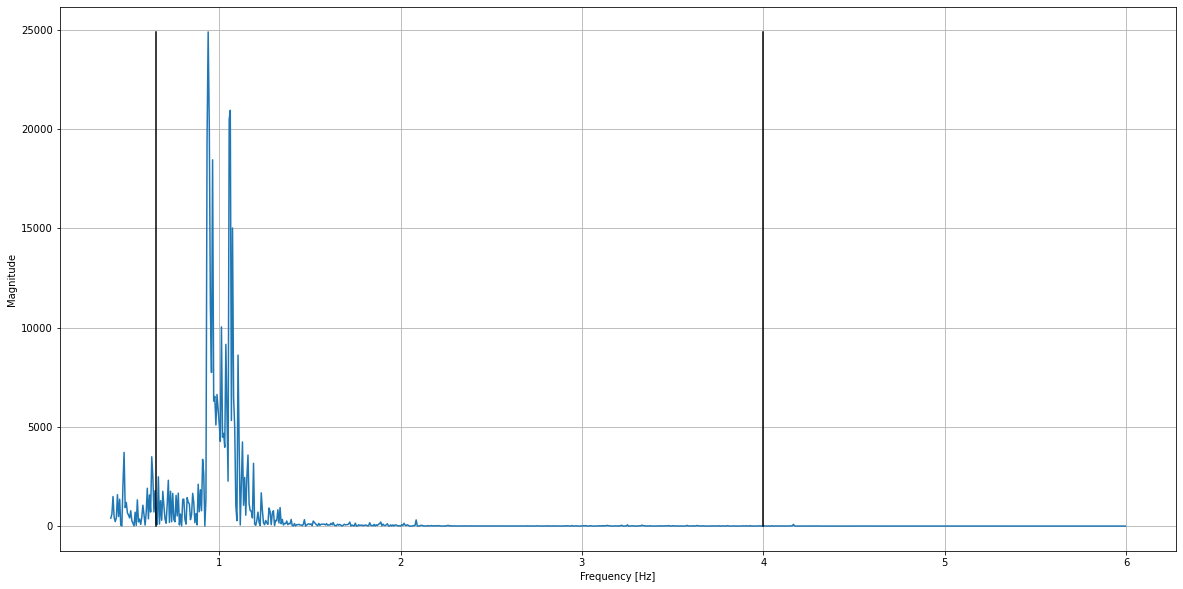

In [10]:
ppg.display_power_spectum(source='GRD_Source')

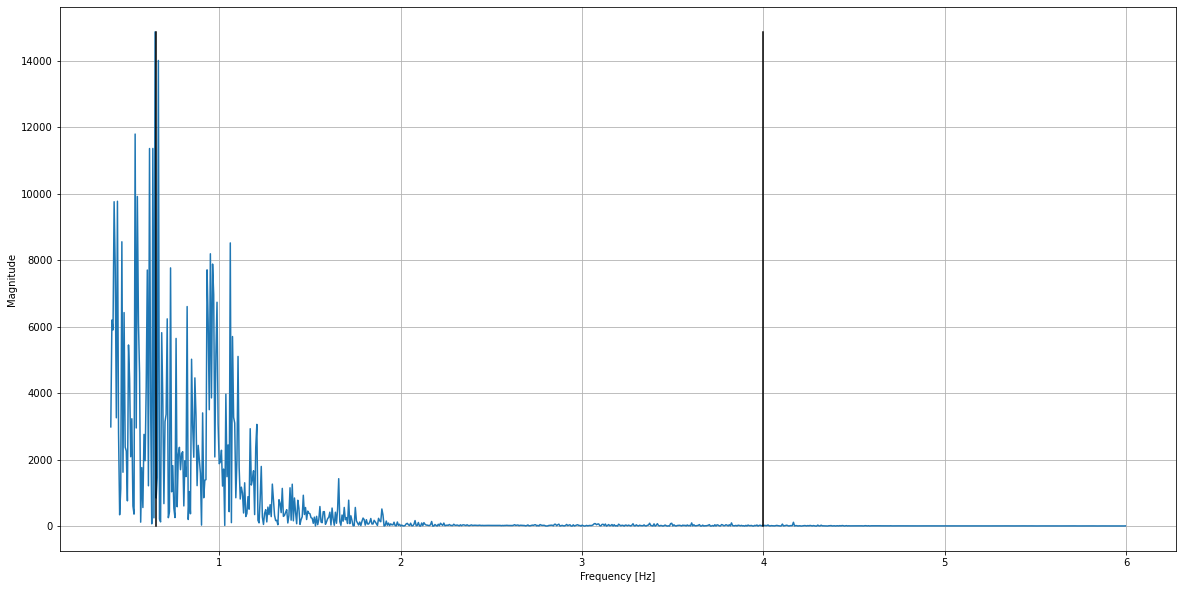

In [11]:
ppg.display_power_spectum(source='B_F')

In [14]:
ppg.display_signals(columns=['G', 'Green_Source', 'ICA_Best_Source'],
                    time_range=(0.0, 30.0),
                    width=0.8)

In [15]:
ppg.predictions

Folds    HR[Hz]    HR[bpm]  Reference[bpm]  Reference[Hz]
0    0.0  1.036585  62.195122       59.364098       0.989402
1    1.0  0.975610  58.536585       58.659233       0.977654
2    2.0  0.975610  58.536585       56.944403       0.949073
3    3.0  0.914634  54.878049       60.875640       1.014594
4    4.0  0.975610  58.536585       61.503178       1.025053
5    5.0  1.036585  62.195122       62.992825       1.049880
6    6.0  1.097561  65.853659       66.071235       1.101187
7    7.0  1.097561  65.853659       64.828538       1.080476
8    8.0  1.097561  65.853659       63.465526       1.057759
9    9.0  1.040816  62.448980       66.530264       1.108838

In [18]:
PPG.MAE(ppg.predictions)

2.2019854074606386

In [20]:
PPG.MSR(ppg.predictions)

7.943115256623564

0.6693072850560677

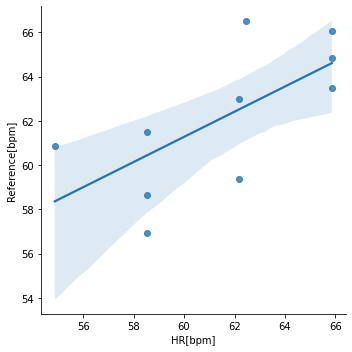

In [21]:
PPG.pearson_correlation(ppg.predictions)

### Evaluate 

In [5]:
from typing import List

In [23]:
def evaluate(
    lowpass_filter=True,
    n_points=12,
    n_folds=10,
    experiment_substring=None,
    show_intermediate_steps=False,
):  
    data_path = Path("../data/")
    results : List[pd.DataFrame] = []
    for experiment_path in data_path.iterdir():
        print('\n----------------------------------------------------------')
        print(f'Experiment: {experiment_path.stem}')
        if experiment_substring is not None:
            if experiment_substring not in experiment_path.stem:
                continue
        df_ppg_path = experiment_path / f"{experiment_path.stem}_ppg.csv"
        df_raw_path = experiment_path / f"{experiment_path.stem}.csv"
        #Run the pipeline
        try:
            ppg = pipeline(
                df_ppg_path,
                df_raw_path,
                lowpass_filter=lowpass_filter,
                n_points=n_points,
                n_folds=n_folds,
            )
        except AssertionError:
            print('Incongruent Dimensions of the reference data.')
            continue
        else:
            #Append the results 
            results.append(ppg.predictions)
            #Display the Power Spectrum
            if show_intermediate_steps:
                ppg.display_power_spectum()
                #Mean Absolute Error
                mae = PPG.MAE(ppg.predictions)
                print(f"Mean Absolute Error: {mae}")
    print("\n##################### RESULTS #####################")
    full_results = pd.concat(results)
    mae_full = PPG.MAE(full_results)
    print(f"Mean Absolute Error: {mae_full}")
    #Pearson Correlation
    pearson_corr = PPG.pearson_correlation(full_results)
    print(f"Pearson Correlation: {pearson_corr}")
    return results




In [ ]:
evaluate()

- Clearly the predictions are not generalizing well for the P2 and P3 experiments

In [ ]:
evaluate(experiment_substring="P1")


In [27]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
n_points_range = np.arange(0, 13, 1)
mae_list = []
for n_points in n_points_range:
    results = evaluate(
        experiment_substring="P1",
        n_points=n_points,
    )
    mae_list.append(PPG.MAE(pd.concat(results)))



Text(0, 0.5, 'Mean Absolute Error (MAE)')

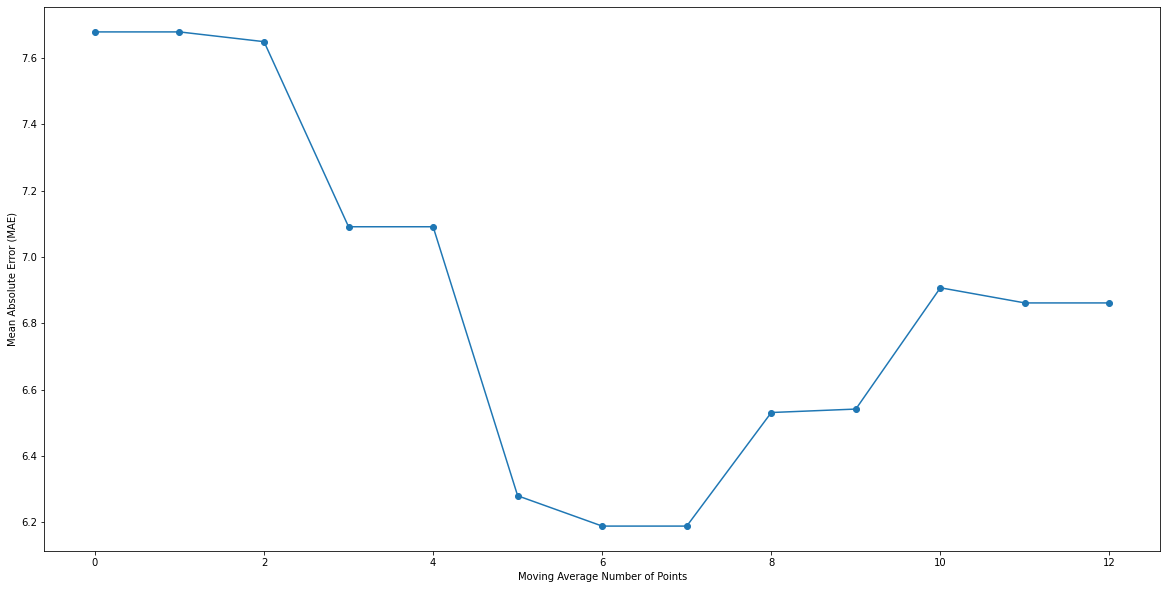

In [33]:
plt.figure(figsize=(20,10))
plt.scatter(n_points_range, mae_list)
plt.plot(n_points_range, mae_list)
plt.xlabel('Moving Average Number of Points')
plt.ylabel('Mean Absolute Error (MAE)')

In [ ]:
n_points_range = np.arange(0, 13, 1)
mae_list = []
for n_points in n_points_range:
    results = evaluate(
        experiment_substring="P1",
        n_points=n_points,
        lowpass_filter=False
    )
    mae_list.append(PPG.MAE(pd.concat(results)))


Text(0, 0.5, 'Mean Absolute Error (MAE)')

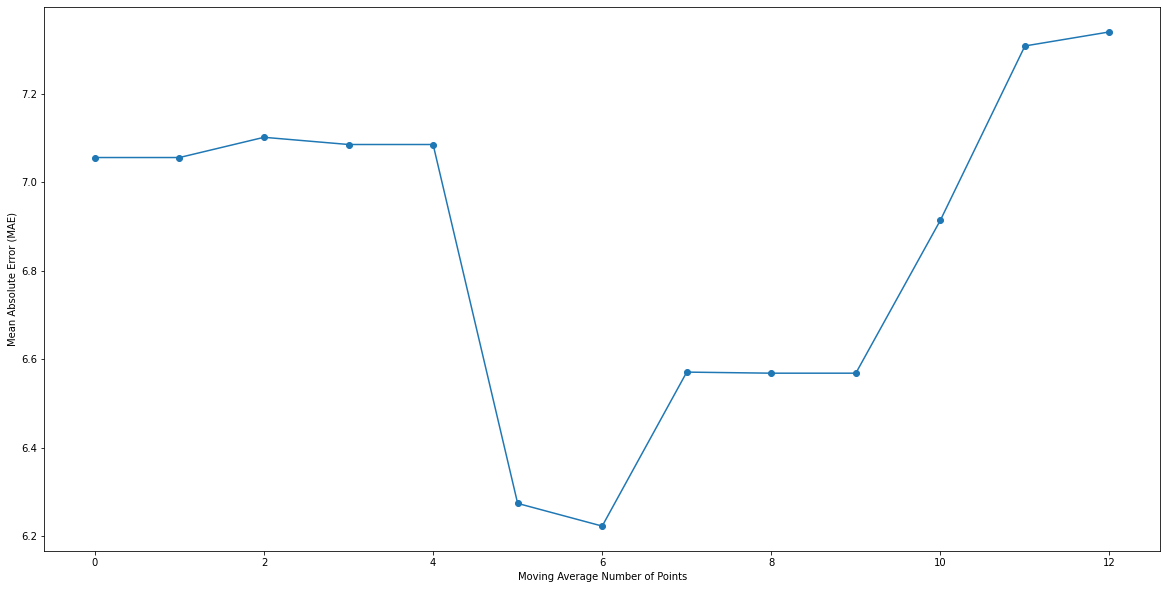

In [35]:
plt.figure(figsize=(20,10))
plt.scatter(n_points_range, mae_list)
plt.plot(n_points_range, mae_list)
plt.xlabel('Moving Average Number of Points')
plt.ylabel('Mean Absolute Error (MAE)')

In [ ]:
evaluate(
    lowpass_filter=False,
    n_points=3,
)

In [ ]:
evaluate(
    lowpass_filter=False,
    n_points=9,
)


----------------------------------------------------------
Experiment: P1LC1
Mixing Matrix
[[-20.7183284  -41.31752551 -44.02404342]
 [-20.71074662  -9.23896167 -67.17982433]
 [-45.34209896   1.67461158 -44.91891637]]
Max Peak Source:  0
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


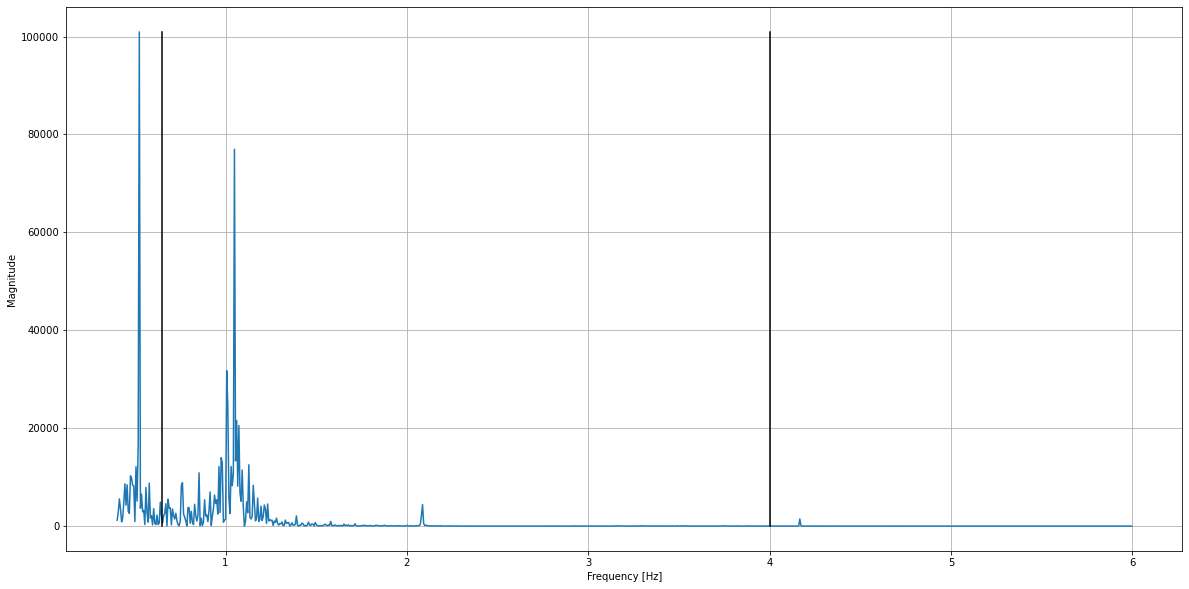

Mean Absolute Error: 7.418861750369269

----------------------------------------------------------
Experiment: P1LC2


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


Mixing Matrix
[[  0.61711662  62.40002204 -29.37449954]
 [-10.62291929  36.0500111  -62.41269472]
 [ 20.61508105  47.01031173 -41.78732281]]
Max Peak Source:  0
Max Peak Source:  0
PPG derived from Green_Source.


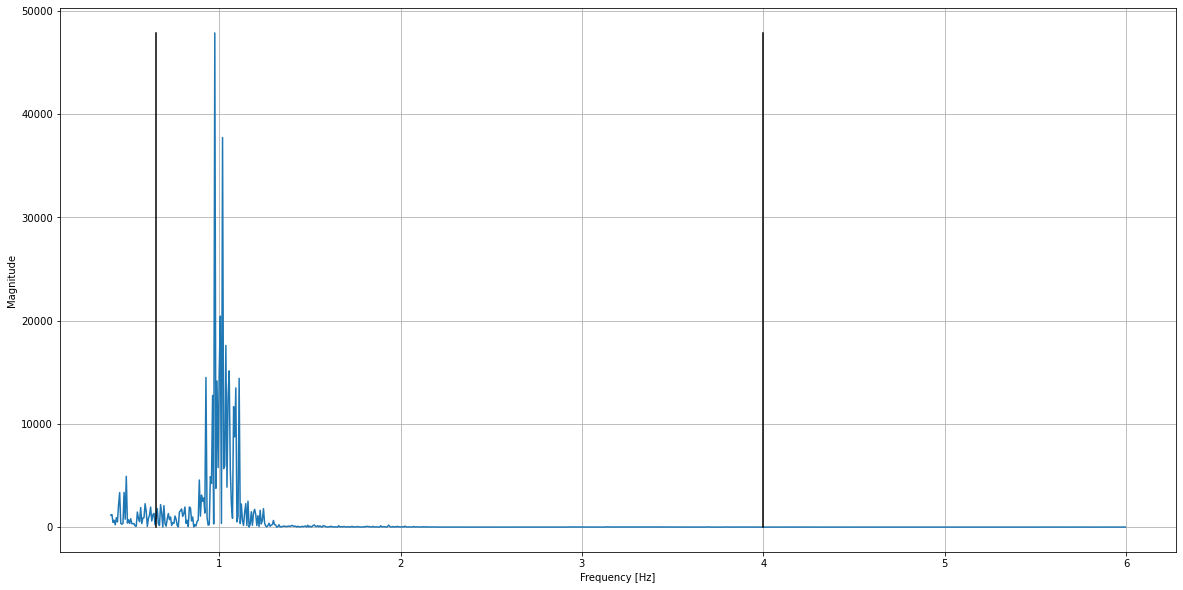

Mean Absolute Error: 8.883815326048056

----------------------------------------------------------
Experiment: P1LC3
Mixing Matrix
[[-54.5777835  -46.17669146  -9.65491464]
 [-65.18946365  -3.33239345 -28.99806811]
 [-40.6687627  -33.65190788 -43.0275702 ]]
Max Peak Source:  0
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


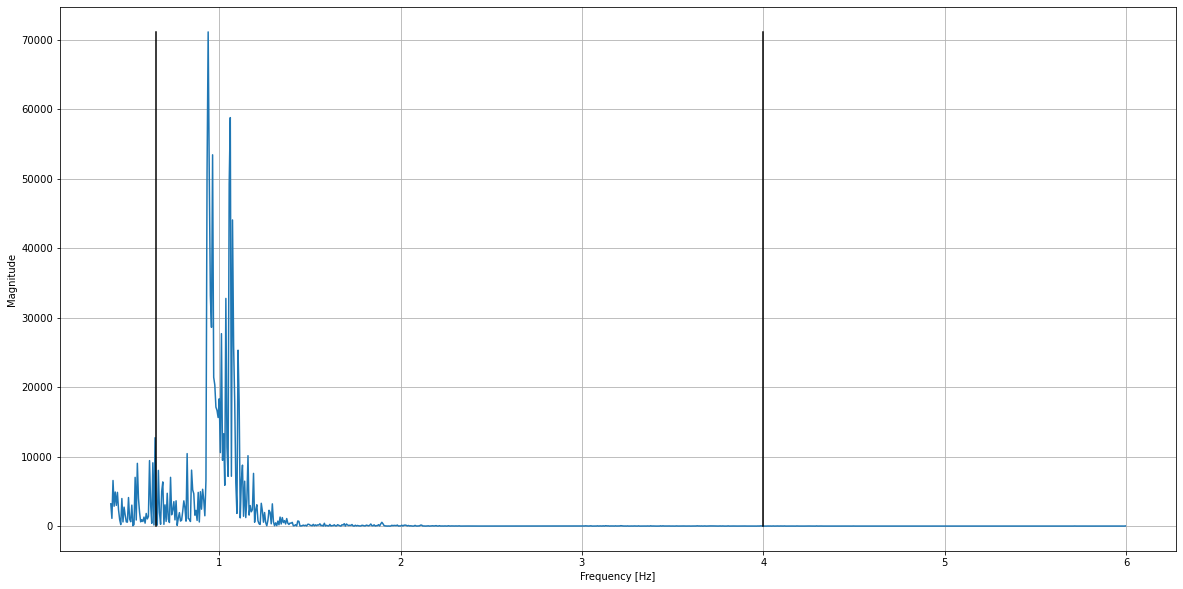

Mean Absolute Error: 2.096174626972837

----------------------------------------------------------
Experiment: P1LC4
Mixing Matrix
[[ 42.29280908 -23.93696583 -52.13398496]
 [  3.63240079 -33.52329735 -64.87937537]
 [  7.58165167   5.68633519 -72.30004925]]
Max Peak Source:  1
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


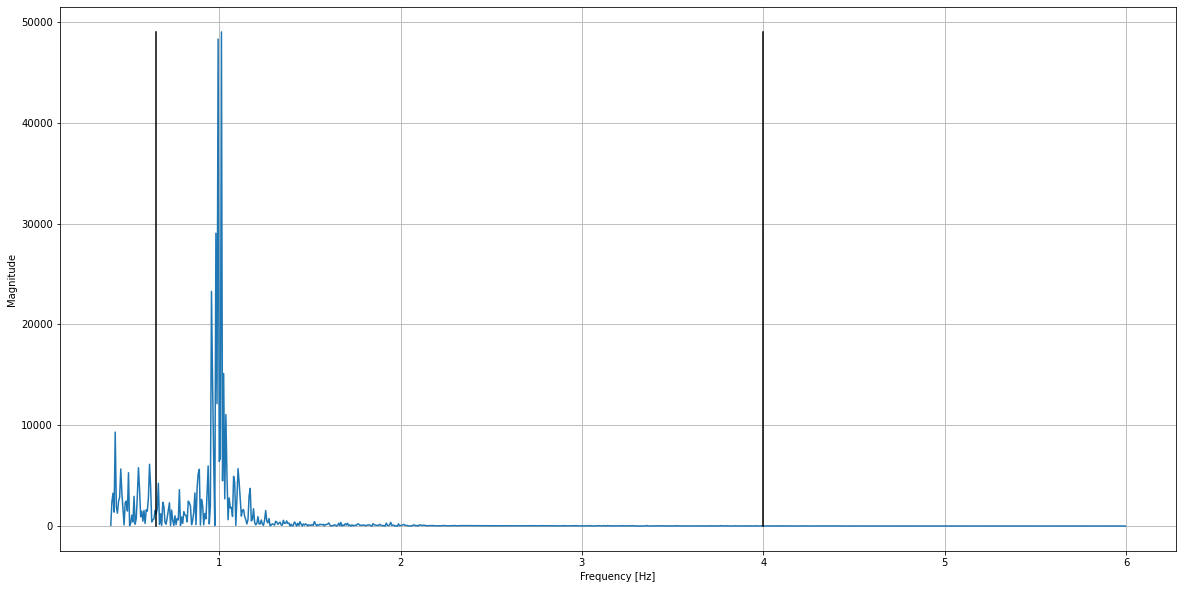

Mean Absolute Error: 1.3237784025918486

----------------------------------------------------------
Experiment: P1LC5
Mixing Matrix
[[16.83280242 10.09025898 67.81013768]
 [-4.17704696 57.13795767 44.16309903]
 [50.5399078  31.28578882 41.31205497]]
Max Peak Source:  1
Max Peak Source:  0


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


PPG derived from Green_Source.


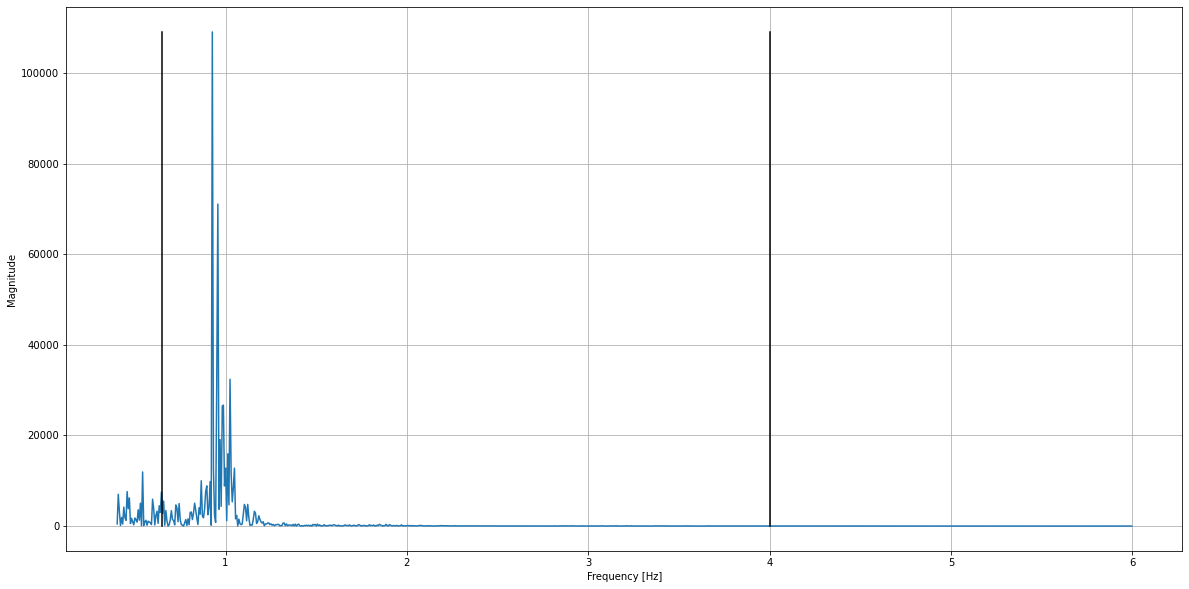

Mean Absolute Error: 0.9352337103765457

----------------------------------------------------------
Experiment: P1LC6
Mixing Matrix
[[-42.68272369 -58.32925921  17.61636995]
 [ 47.35620779  52.6109138  -22.85783033]
 [ 45.15333361  57.46951184 -13.93749559]]
Max Peak Source:  0
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


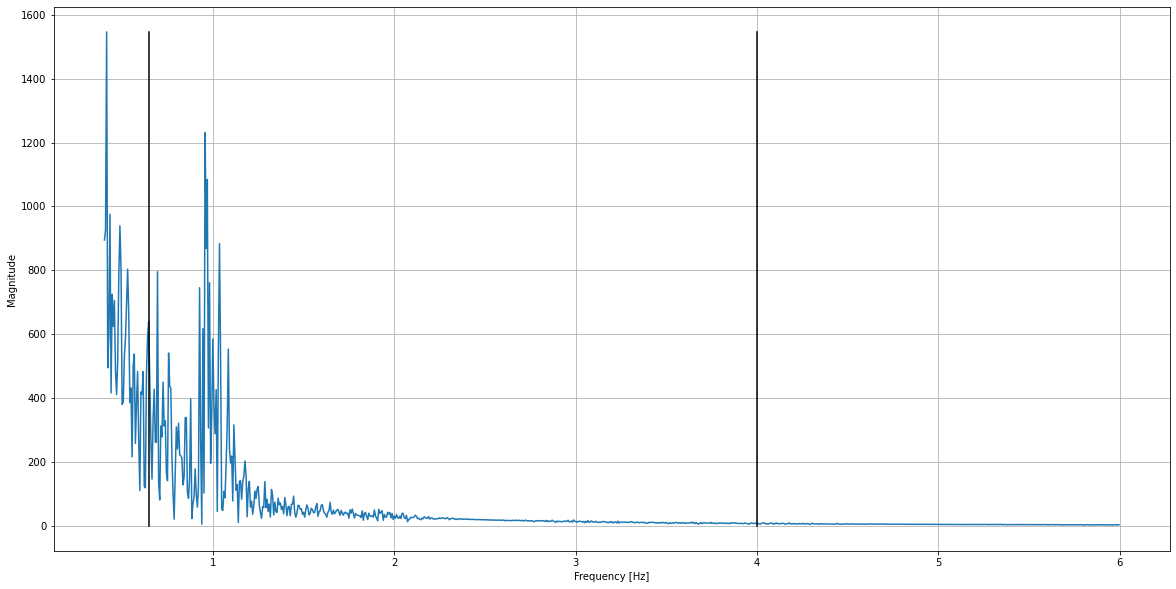

Mean Absolute Error: 7.517315318232582

----------------------------------------------------------
Experiment: P1LC7
Mixing Matrix
[[  9.25853058 -55.45608959 -44.25701123]
 [ 36.9680715  -51.89677863 -35.31972113]
 [ 24.39669124 -41.43082639 -53.63138752]]
Max Peak Source:  0
Max Peak Source:  0
PPG derived from Green_Source.
Incongruent Dimensions of the reference data.

----------------------------------------------------------
Experiment: P1M1
Mixing Matrix
[[ 46.38765255 -55.98553229 -14.82452008]
 [ 53.5926749  -50.97651571  -3.60768524]
 [ 50.60618096 -54.18733159   3.88307119]]


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.
Incongruent Dimensions of the reference data.

----------------------------------------------------------
Experiment: P1M2
Mixing Matrix
[[34.10212296 44.26673532 22.99941578]
 [34.80226453 36.7714088  36.91213896]
 [42.51934137 36.96638267 28.0792742 ]]
Max Peak Source:  0


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


Max Peak Source:  0
PPG derived from Green_Source.


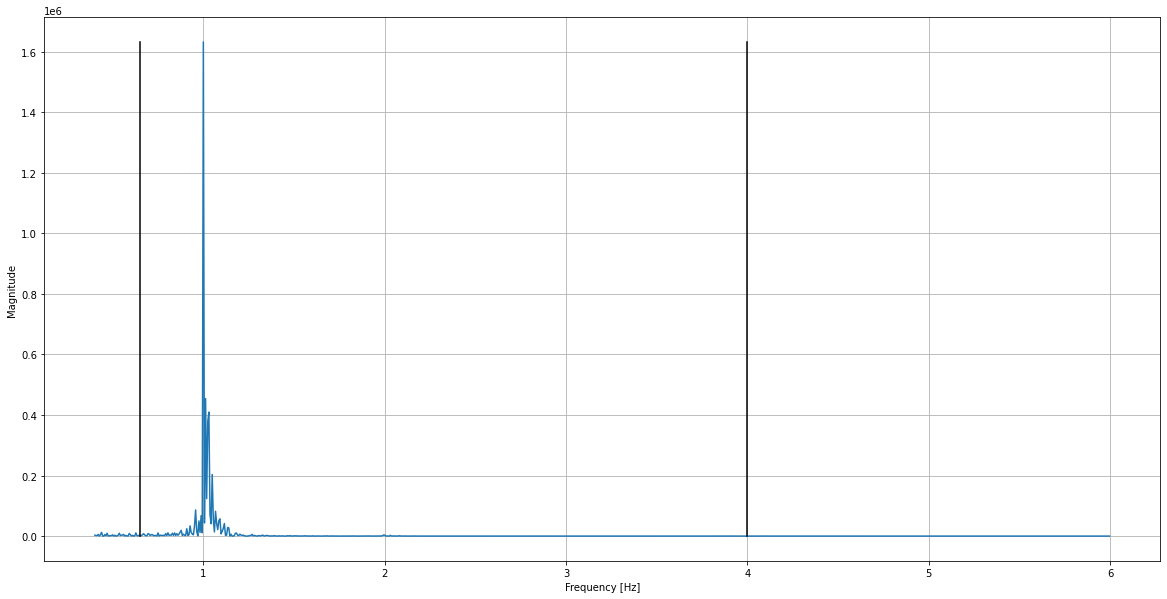

Mean Absolute Error: 21.932411855972383

----------------------------------------------------------
Experiment: P1M3
Mixing Matrix
[[ 43.01521599 -36.20759744  -6.18403656]
 [ 54.16908721 -22.98061259   1.3543415 ]
 [ 46.72202685 -30.43323332   8.71199298]]
Max Peak Source:  1
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


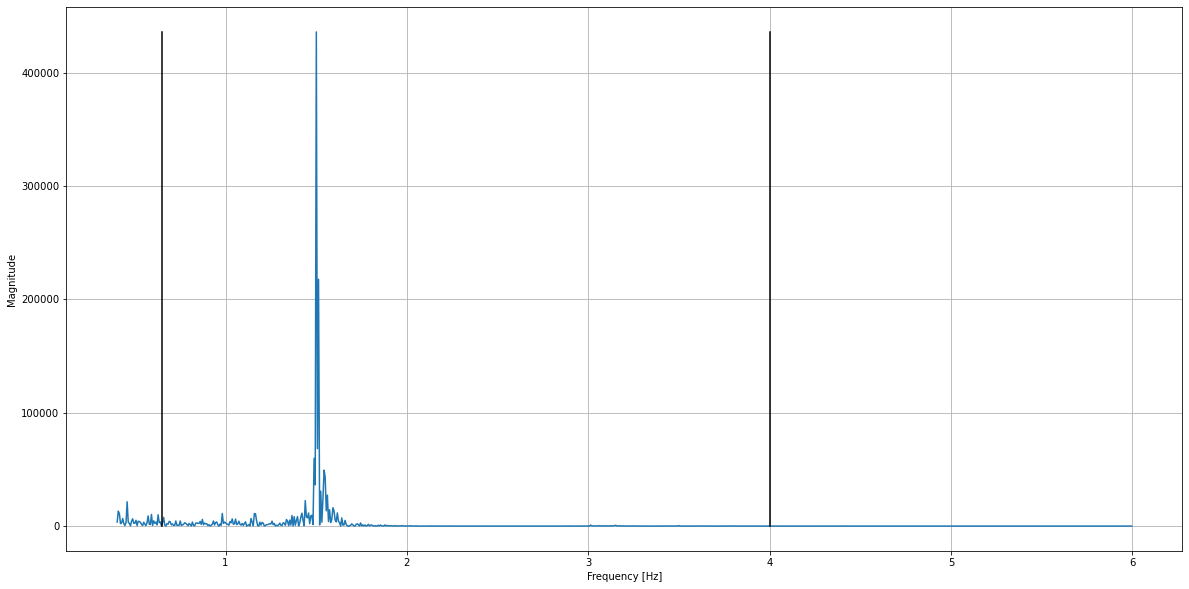

Mean Absolute Error: 8.612052562909042

----------------------------------------------------------
Experiment: P2LC1
Mixing Matrix
[[ -7.14314636   2.84793838  71.77604689]
 [ -4.28624017  15.68628825  69.9285136 ]
 [-19.16143459  23.06039299  62.04304839]]
Max Peak Source:  0
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


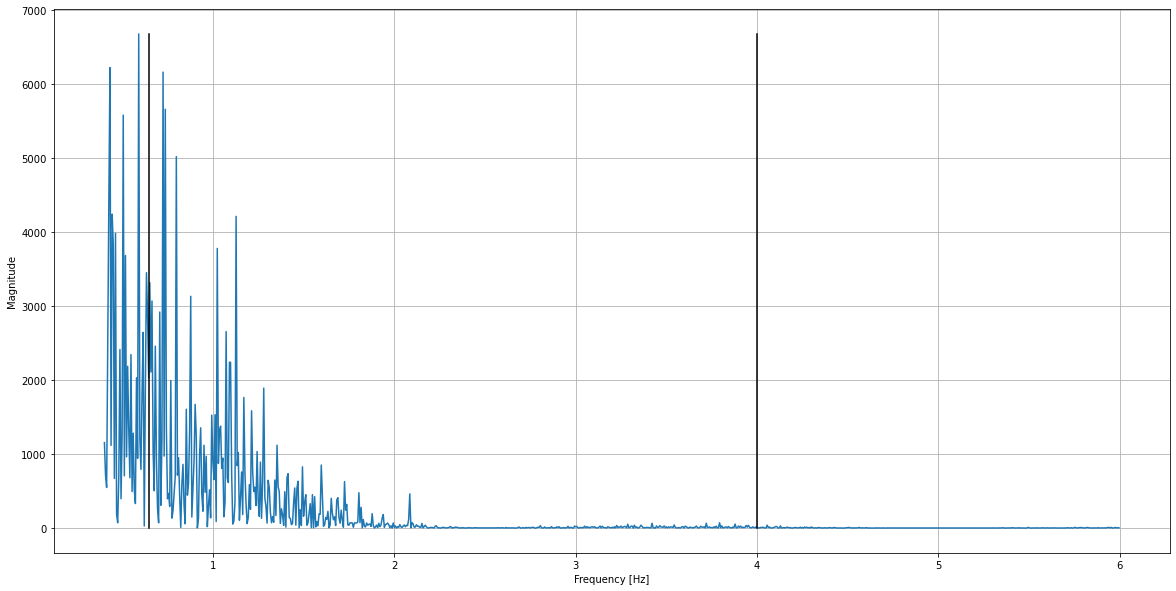

Mean Absolute Error: 41.95393229425536

----------------------------------------------------------
Experiment: P2LC2
Mixing Matrix
[[ -6.9390737  -68.37098384  12.76313511]
 [-26.80779185 -63.66950252  -6.18906945]
 [  2.93929386 -60.43093487 -14.29927311]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


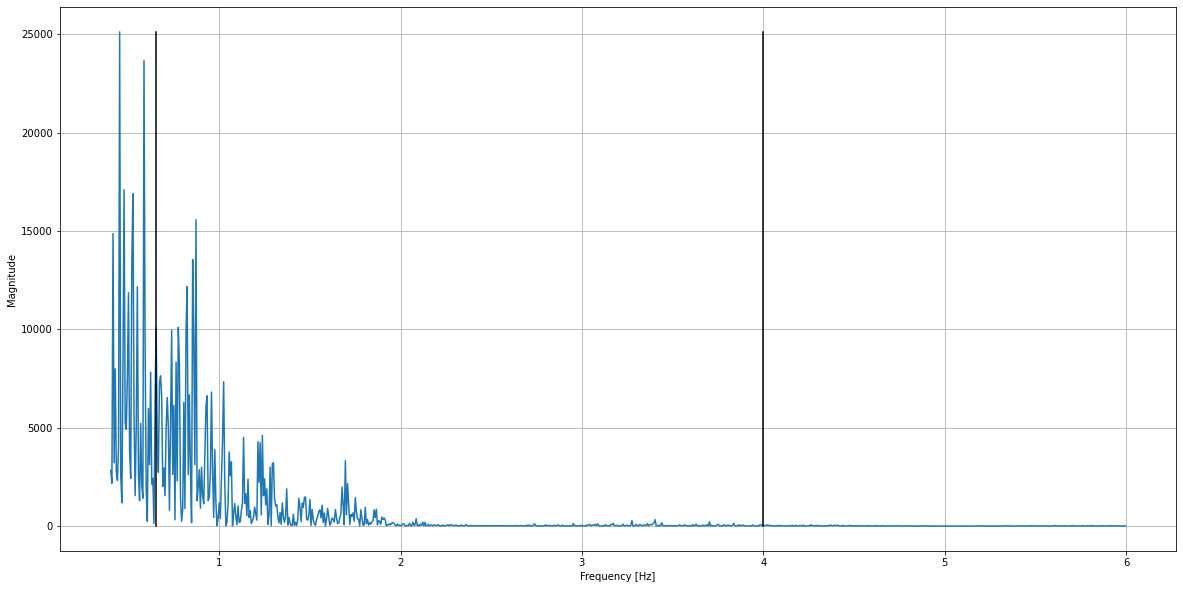

Mean Absolute Error: 45.40857069816443

----------------------------------------------------------
Experiment: P2LC3
Mixing Matrix
[[ 60.479259    -8.23261168 -39.24456358]
 [ 56.30578348 -21.00879274 -40.0961888 ]
 [ 41.76799998 -16.67772718 -53.19507502]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


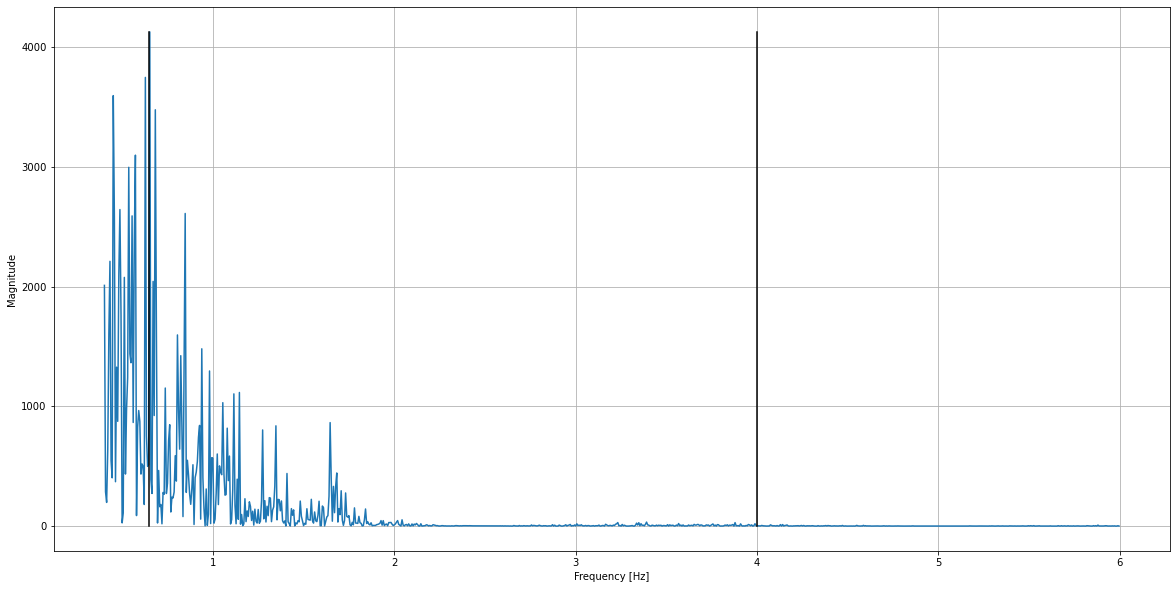

Mean Absolute Error: 54.64230614719463

----------------------------------------------------------
Experiment: P2LC4
Mixing Matrix
[[ 24.66619996  59.43294675  26.03172179]
 [ 32.71535152  45.96472083  36.3467002 ]
 [-10.79863824   9.75884918  57.77005155]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


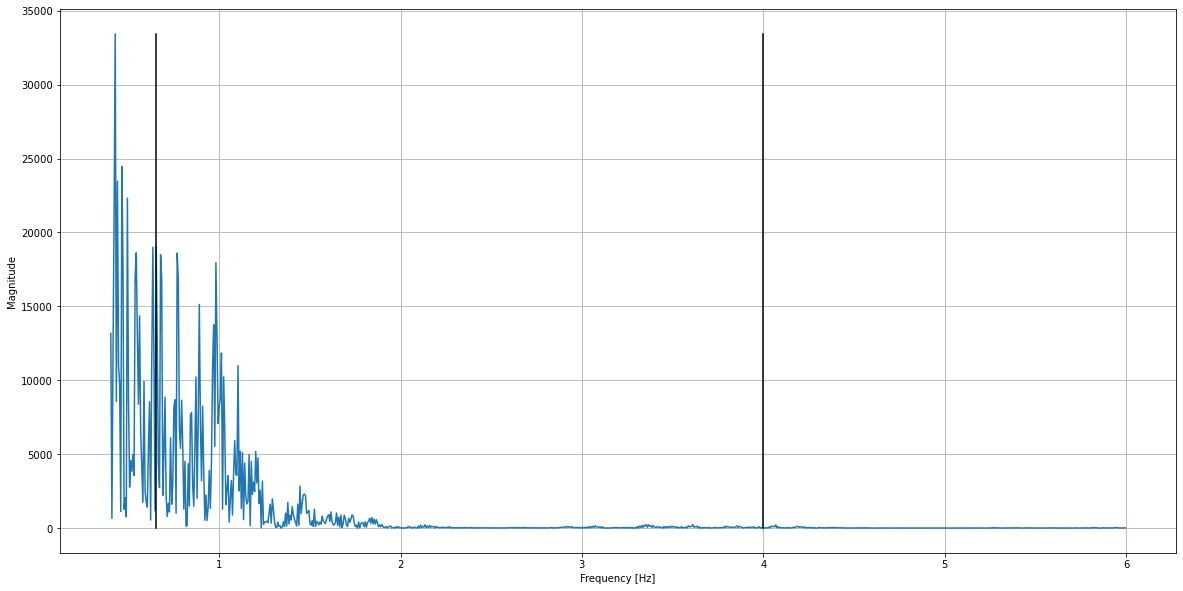

Mean Absolute Error: 40.992030607057025

----------------------------------------------------------
Experiment: P2LC5
Mixing Matrix
[[-41.19310099  53.50169521 -17.1016274 ]
 [-49.28077593  29.0156579  -39.03066023]
 [-32.88917752   8.49154249 -62.55595896]]
Max Peak Source:  0
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


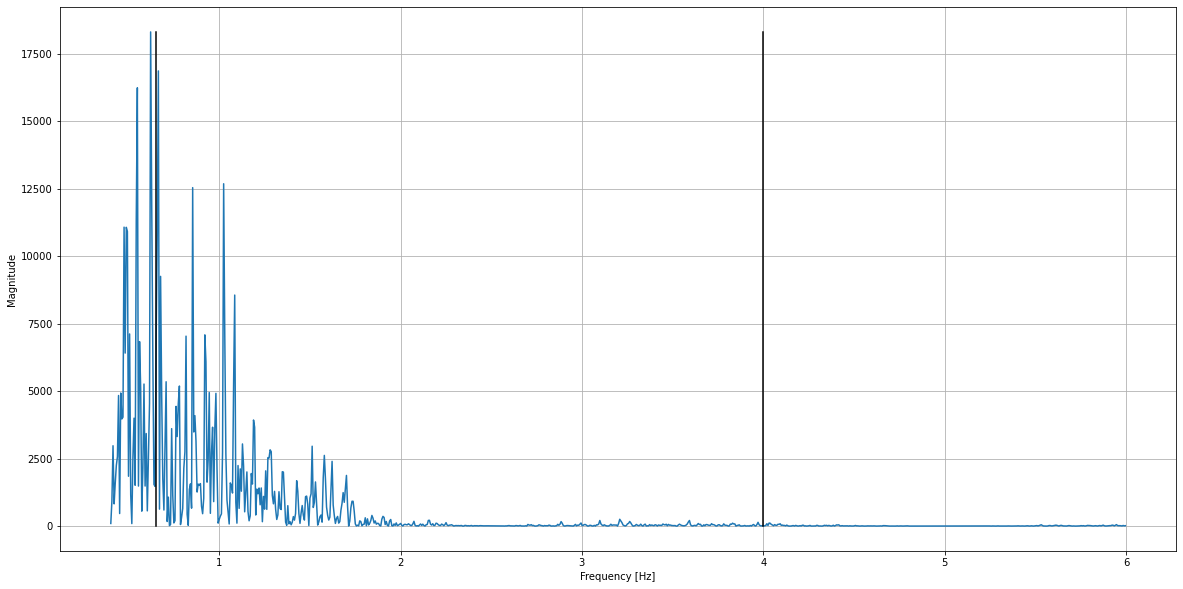

Mean Absolute Error: 51.841747627179394

----------------------------------------------------------
Experiment: P3LC2
Mixing Matrix
[[  4.26157933 -57.77141482  23.95128929]
 [-12.30276351 -61.51795361  11.40513369]
 [  4.54220356 -52.72284078 -32.99188127]]
Max Peak Source:  0
Max Peak Source:  0
PPG derived from Green_Source.
Incongruent Dimensions of the reference data.

----------------------------------------------------------
Experiment: P3LC3


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


Mixing Matrix
[[-66.74942778   9.41780982 -14.03730372]
 [-57.9246901   23.56454718 -30.6111436 ]
 [-21.41859031  59.95759165 -25.0649641 ]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.


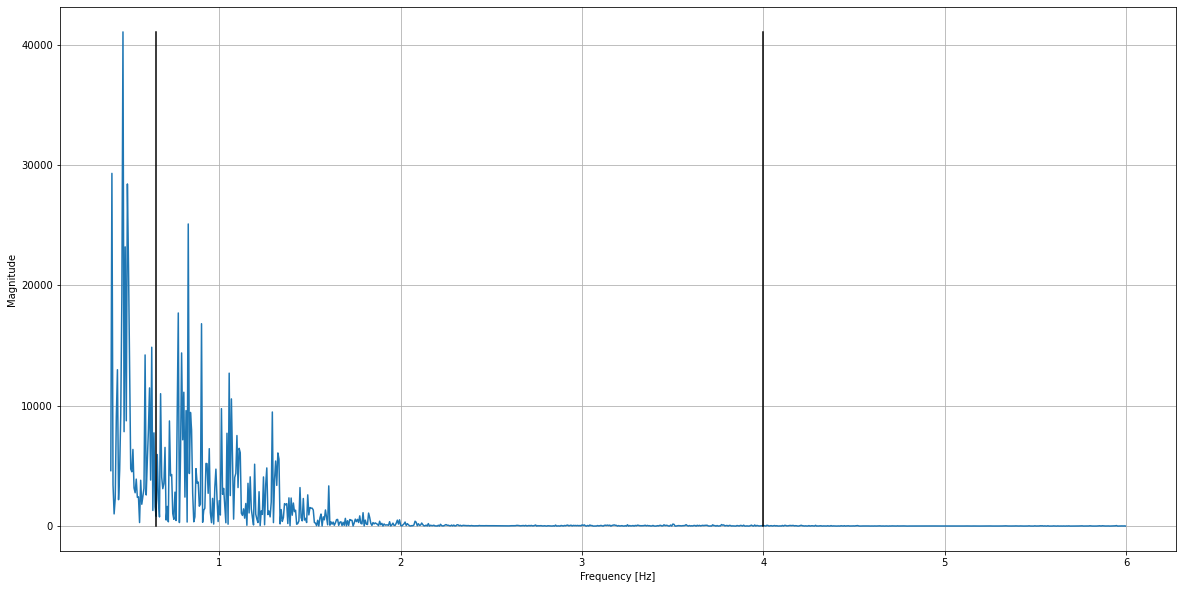

Mean Absolute Error: 40.195877580729466

----------------------------------------------------------
Experiment: P3LC4
Mixing Matrix
[[-51.24415494  27.55862831 -36.61688774]
 [-53.34575499  19.53536707 -38.35065879]
 [-65.89723343   9.02495075 -22.99115145]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


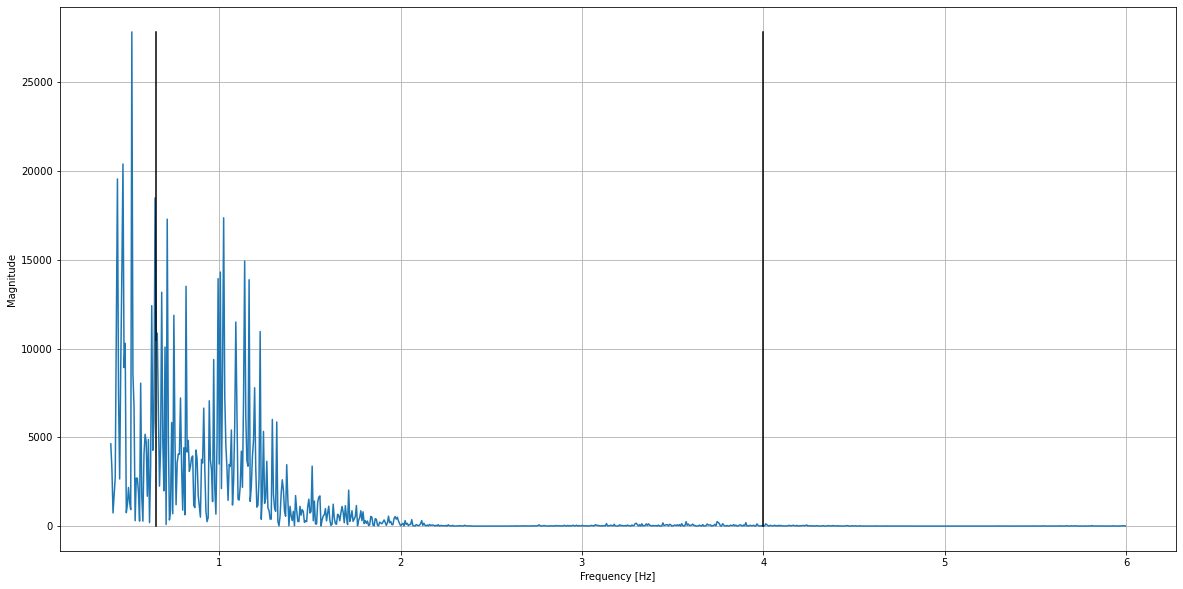

Mean Absolute Error: 50.193795087755305

----------------------------------------------------------
Experiment: P3LC5
Mixing Matrix
[[ 23.22055537 -63.71075151   4.53218073]
 [ 36.40402305 -56.18045039  17.74135724]
 [ 47.92364274 -46.35630827   8.90027862]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


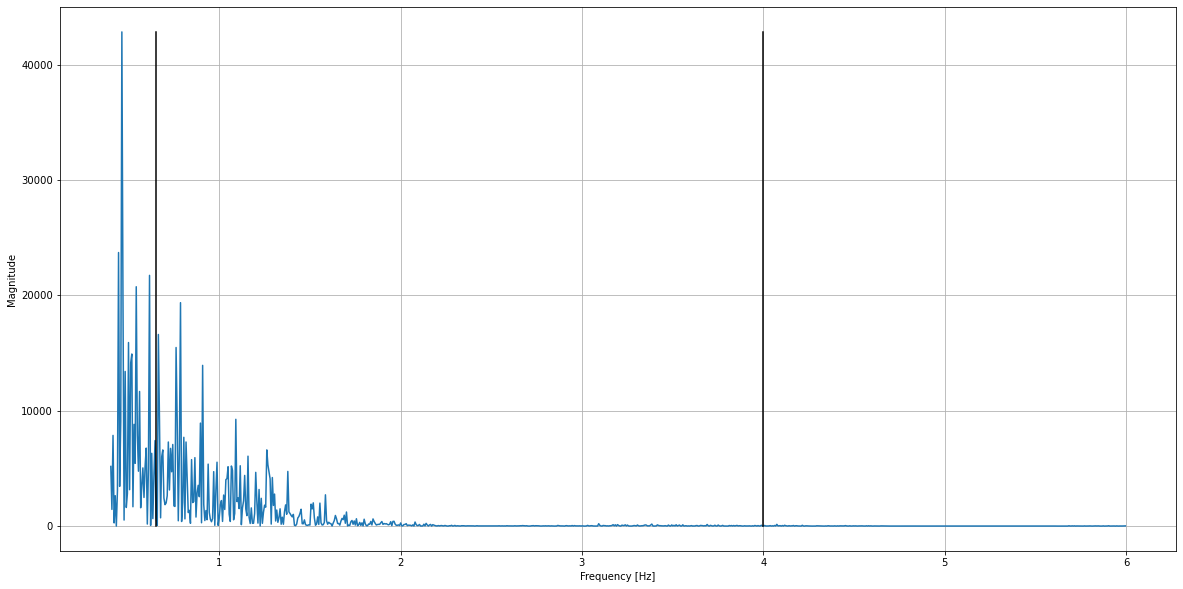

Mean Absolute Error: 43.45023218323257

##################### RESULTS #####################
Mean Absolute Error: 26.712383486190042
Pearson Correlation: -0.08686023951143068


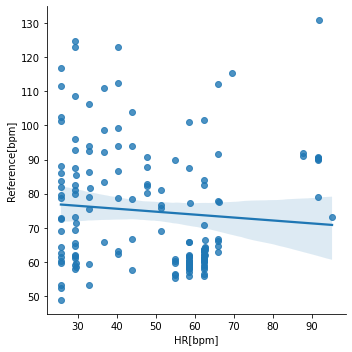

In [19]:
evaluate(
    lowpass_filter=False,
    n_points=12,
)


----------------------------------------------------------
Experiment: P1LC1
Mixing Matrix
[[-24.45732745  43.23258831 -46.87713663]
 [-21.04692839  69.37882404 -12.03804111]
 [-50.53370498  45.13900015   1.905491  ]]
Max Peak Source:  0
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


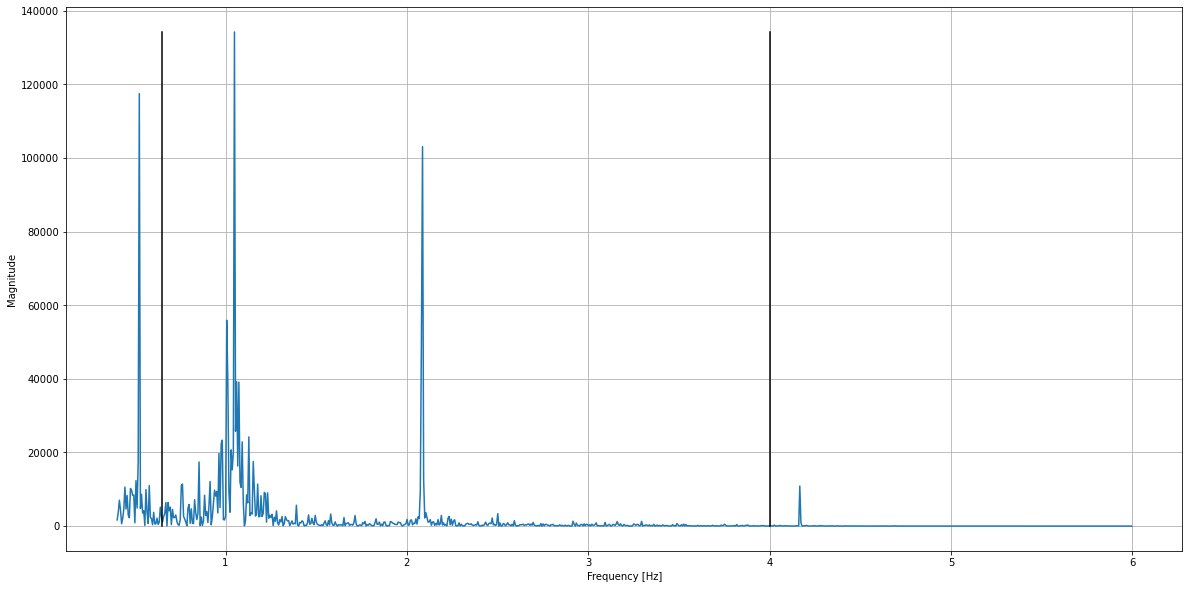

Mean Absolute Error: 14.641462982076584

----------------------------------------------------------
Experiment: P1LC2
Mixing Matrix
[[ 23.71549115  66.12161684 -11.42482283]
 [ 39.18800953  42.30736297 -46.71410219]
 [ 47.95064531  47.44999359  -7.53433063]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


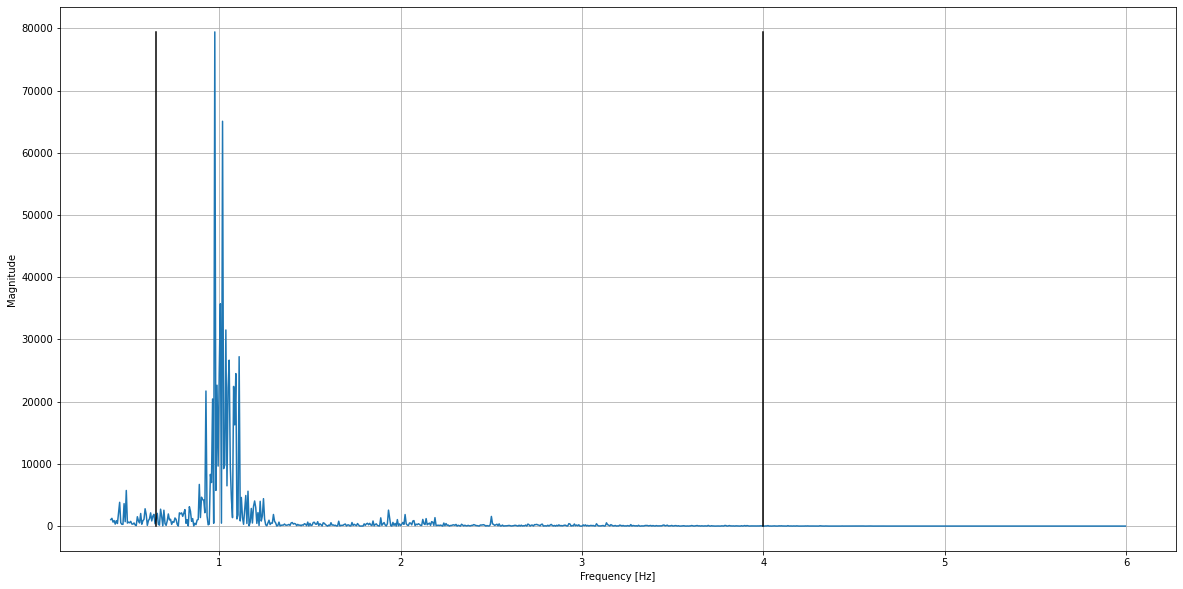

Mean Absolute Error: 2.2384802000317996

----------------------------------------------------------
Experiment: P1LC3
Mixing Matrix
[[ -9.86279743 -55.69442682 -46.31456724]
 [-30.74765729 -67.79934056  -1.65820174]
 [-45.11257199 -41.25743155 -33.83603003]]
Max Peak Source:  1
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


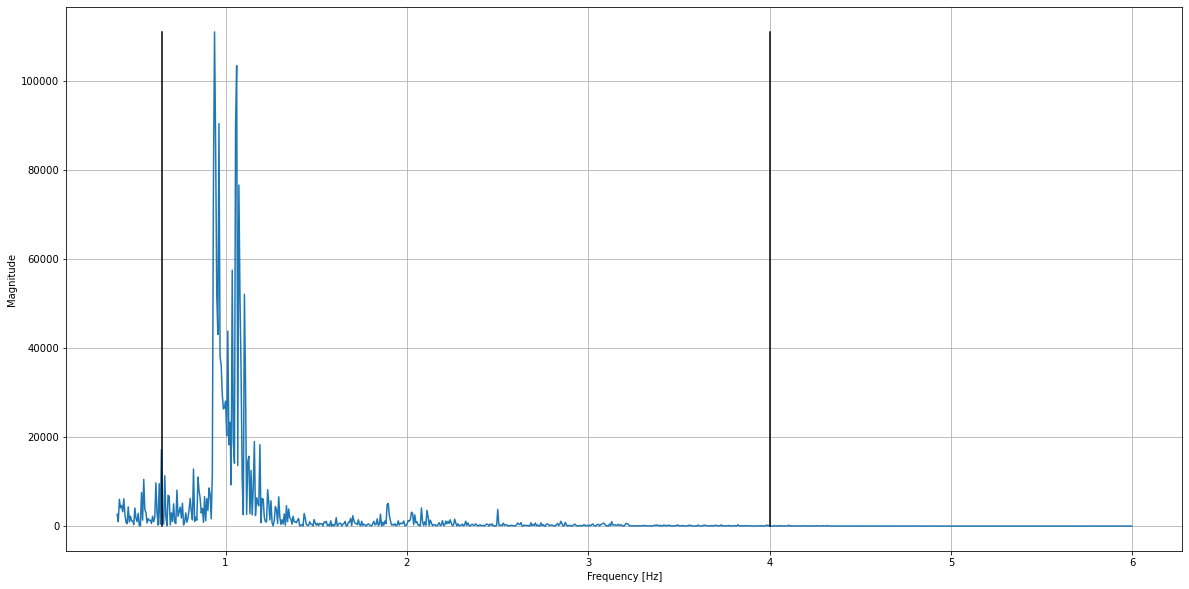

Mean Absolute Error: 2.2019854074606386

----------------------------------------------------------
Experiment: P1LC4
Mixing Matrix
[[ 23.16953082 -51.03707915 -46.20264845]
 [ 35.11153685 -64.95196751  -6.85346078]
 [ -5.19727941 -72.45663402  -9.30863051]]
Max Peak Source:  0
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


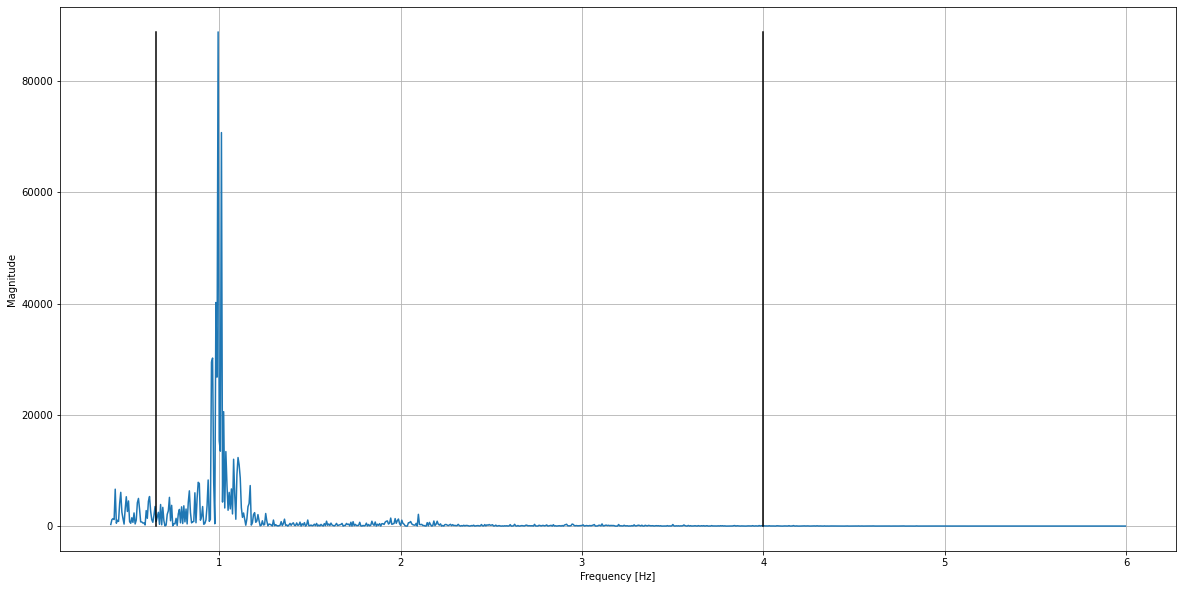

Mean Absolute Error: 1.3237784025918486

----------------------------------------------------------
Experiment: P1LC5
Mixing Matrix
[[ 70.09357137 -17.07189245   7.57048379]
 [ 47.36116573   4.58030451  56.78414663]
 [ 42.26204551 -50.97737407  30.31586672]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


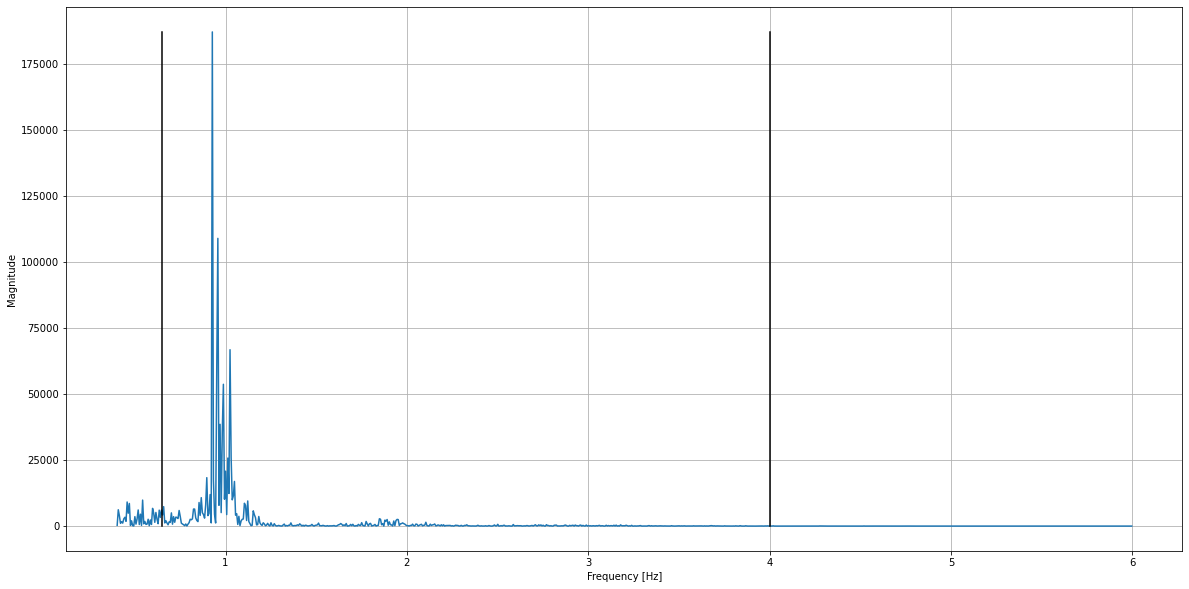

Mean Absolute Error: 1.237384454278984

----------------------------------------------------------
Experiment: P1LC6
Mixing Matrix
[[ 17.47588616  42.69603086  58.49230136]
 [-22.74097962 -47.6741459  -52.53322914]
 [-13.76446816 -45.26049963 -57.55825626]]
Max Peak Source:  1
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


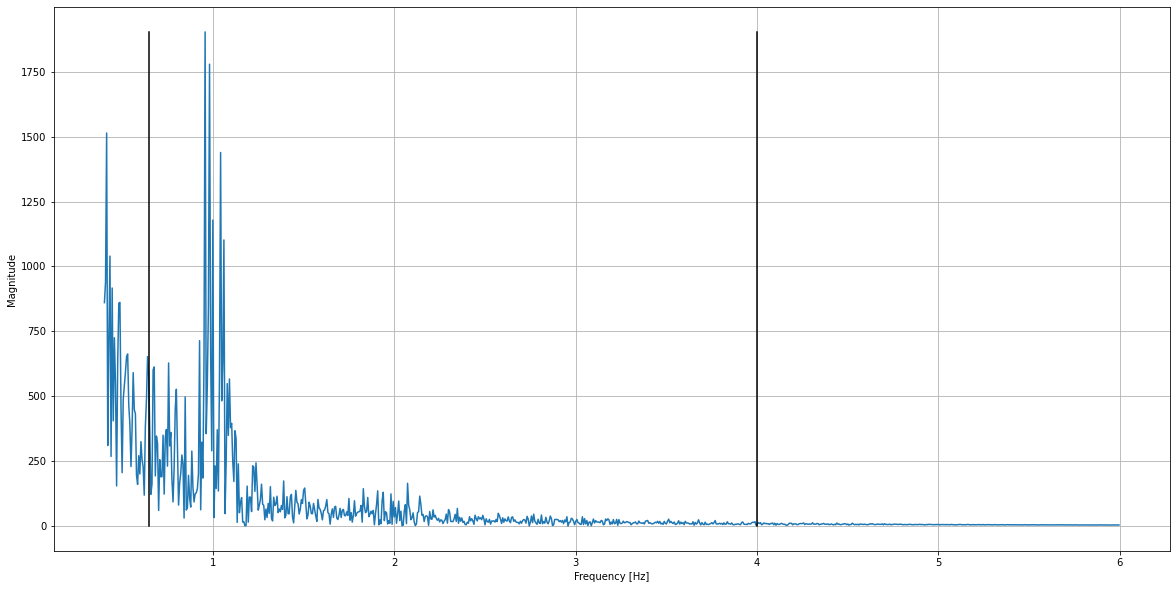

Mean Absolute Error: 4.77689510278543

----------------------------------------------------------
Experiment: P1LC7
Mixing Matrix
[[-56.54431302 -44.81158147   8.32271577]
 [-53.1176618  -35.25875663  37.65708308]
 [-41.3962151  -54.23528708  24.56544577]]
Max Peak Source:  1
Max Peak Source:  1
PPG derived from GRD_Source.
Incongruent Dimensions of the reference data.

----------------------------------------------------------
Experiment: P1M1
Mixing Matrix
[[-14.48573423  48.15220204 -57.1124831 ]
 [ -2.41605868  56.05087913 -51.34664572]
 [  5.66763031  52.76838615 -54.50138406]]
Max Peak Source:  0


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


Max Peak Source:  0
PPG derived from Green_Source.
Incongruent Dimensions of the reference data.

----------------------------------------------------------
Experiment: P1M2
Mixing Matrix
[[-60.77907059  39.92178024 -13.18643545]
 [-57.46138486  36.77318941 -29.5728053 ]
 [-65.41332727  28.04196836 -22.45159452]]
Max Peak Source:  0
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


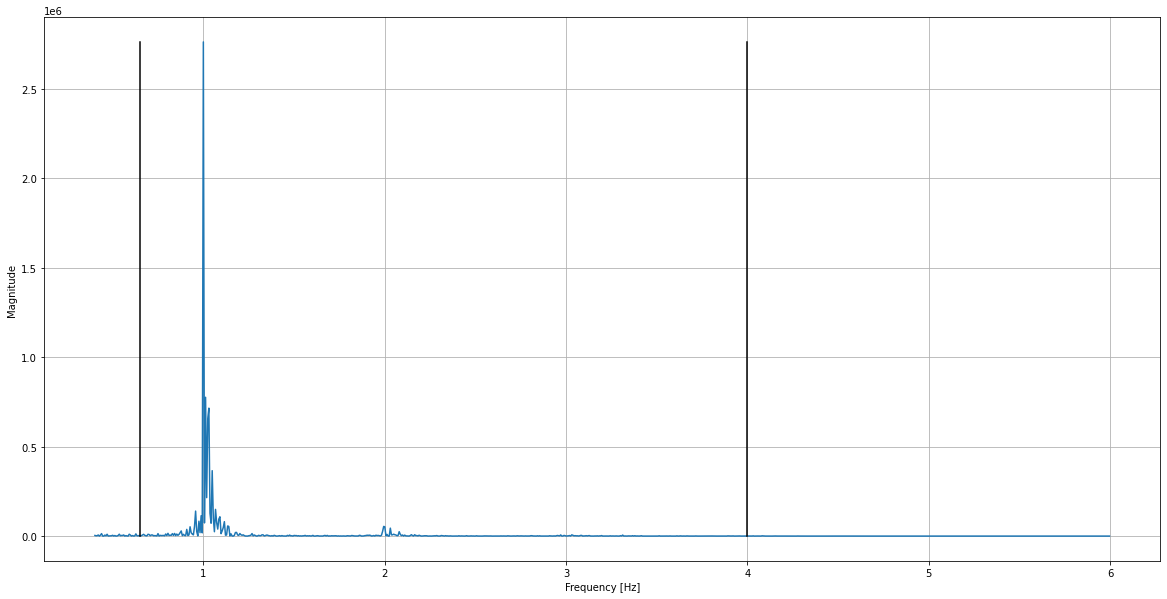

Mean Absolute Error: 21.696931299061813

----------------------------------------------------------
Experiment: P1M3
Mixing Matrix
[[  6.72021327 -29.22183308 -65.71250652]
 [ 23.95096793 -38.54603965 -56.33525233]
 [ 26.76609035 -24.91214267 -62.28640318]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


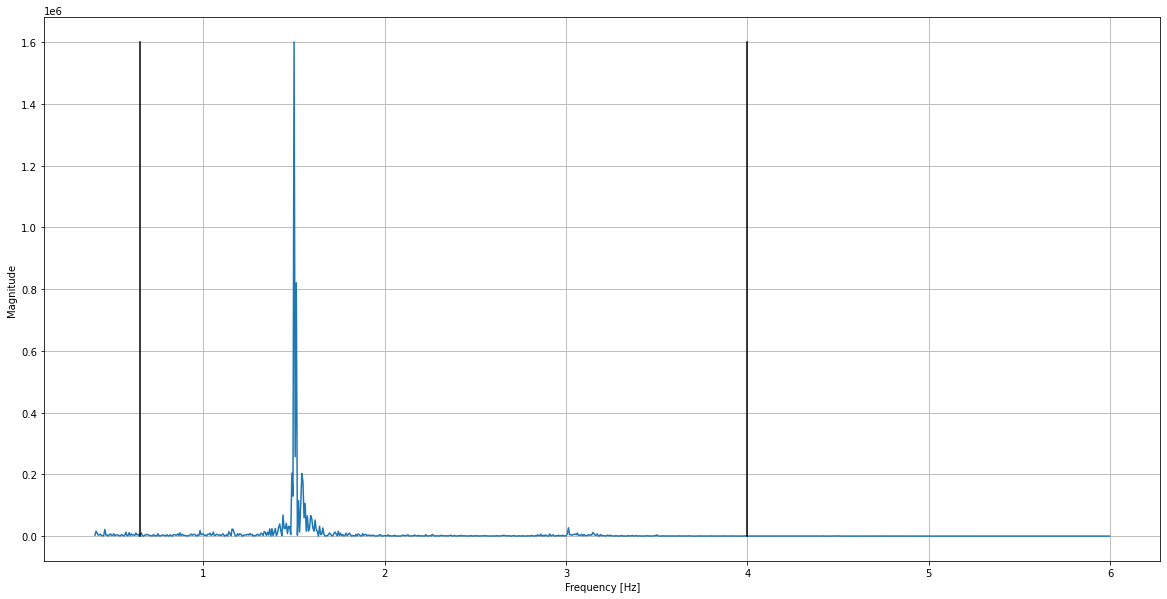

Mean Absolute Error: 8.613545843147968

----------------------------------------------------------
Experiment: P2LC1
Mixing Matrix
[[-2.96837252  7.30997152 72.70409994]
 [ 9.62189142 16.43437423 70.63803647]
 [ 0.30848727 34.18931473 62.57883333]]
Max Peak Source:  0
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


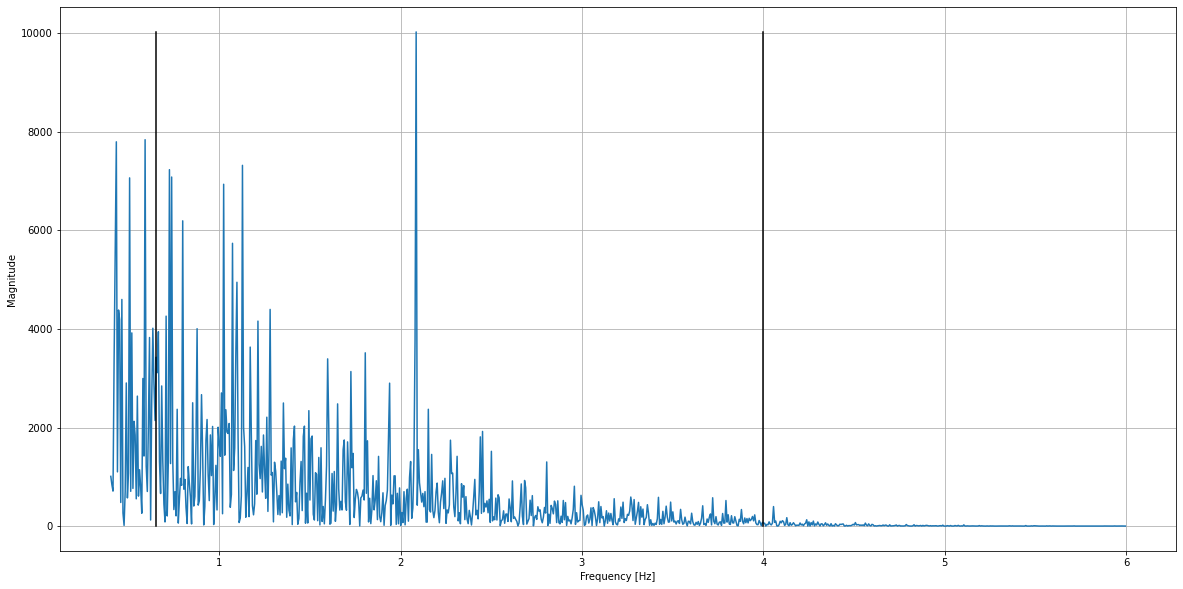

Mean Absolute Error: 41.23059585523097

----------------------------------------------------------
Experiment: P2LC2
Mixing Matrix
[[ 70.65739663   9.62455861  -5.42027559]
 [ 65.44088357 -11.41891746 -27.13563653]
 [ 62.48805986 -22.45222991   5.39847275]]
Max Peak Source:  2
Max Peak Source:  1
PPG derived from GRD_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


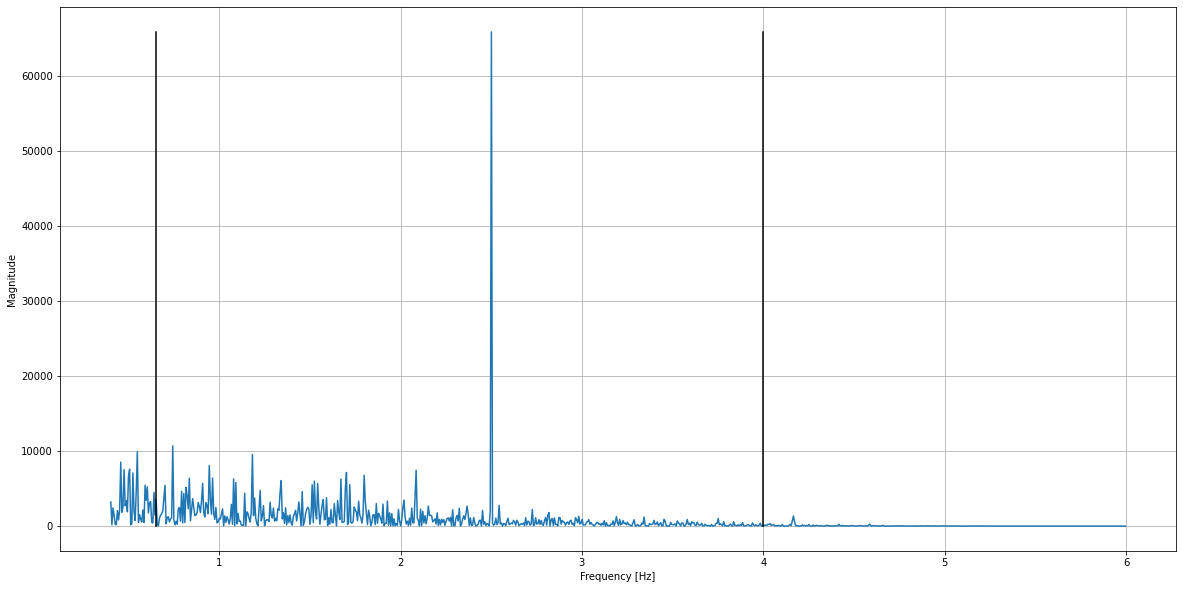

Mean Absolute Error: 56.449792293153656

----------------------------------------------------------
Experiment: P2LC3
Mixing Matrix
[[  3.75349677 -72.09224065 -12.09684542]
 [ 12.93235888 -71.95570639  -0.50681185]
 [ 30.10522302 -63.74329106 -11.53534788]]
Max Peak Source:  2
Max Peak Source:  1
PPG derived from GRD_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


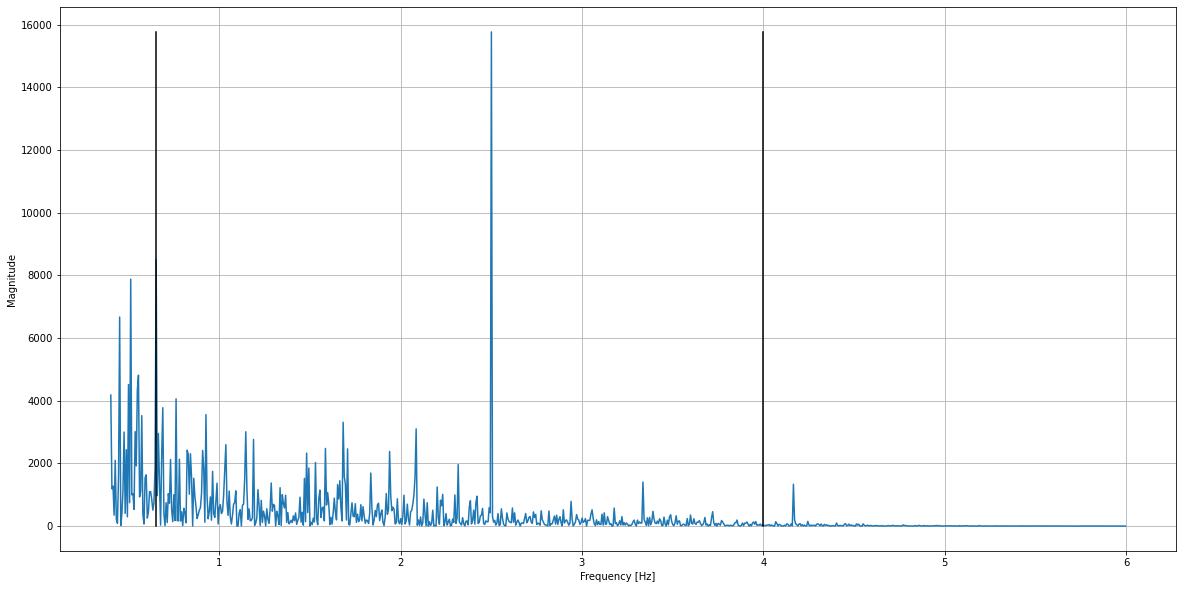

Mean Absolute Error: 50.29089776657409

----------------------------------------------------------
Experiment: P2LC4
Mixing Matrix
[[ 60.25353047 -23.7999745  -30.44576962]
 [ 46.29421671 -32.61167029 -41.88901533]
 [  8.8574341   10.38436209 -65.09658762]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


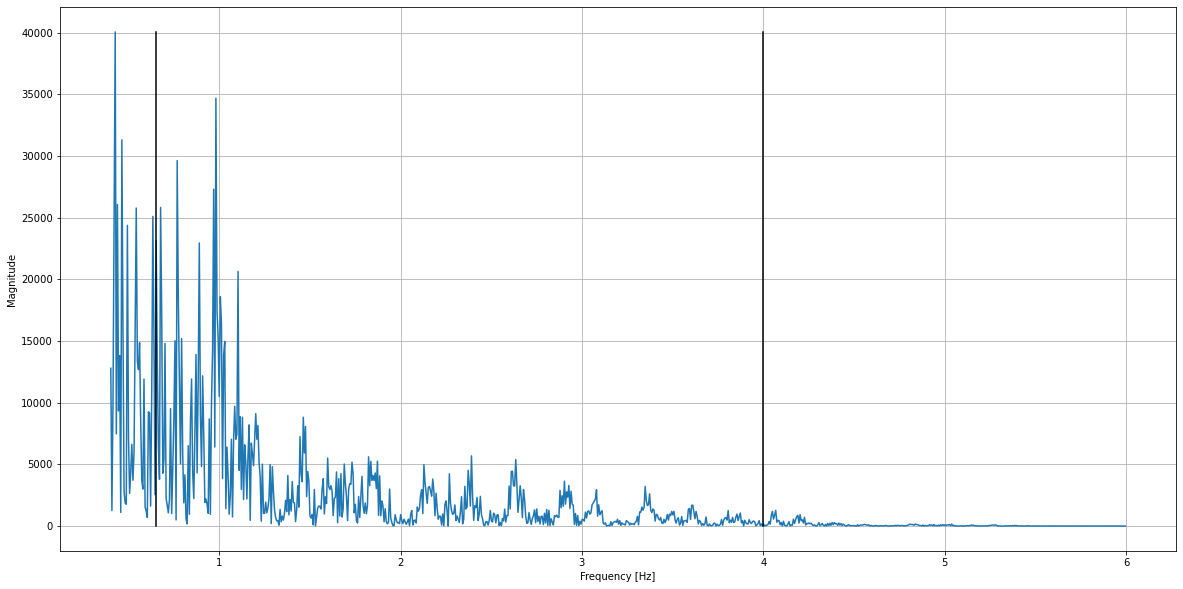

Mean Absolute Error: 38.981287111542606

----------------------------------------------------------
Experiment: P2LC5
Mixing Matrix
[[-43.64973854 -53.86848855 -17.8422678 ]
 [-52.09987354 -28.4608638  -39.57669619]
 [-34.79059011  -7.71403745 -62.95139922]]
Max Peak Source:  1
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


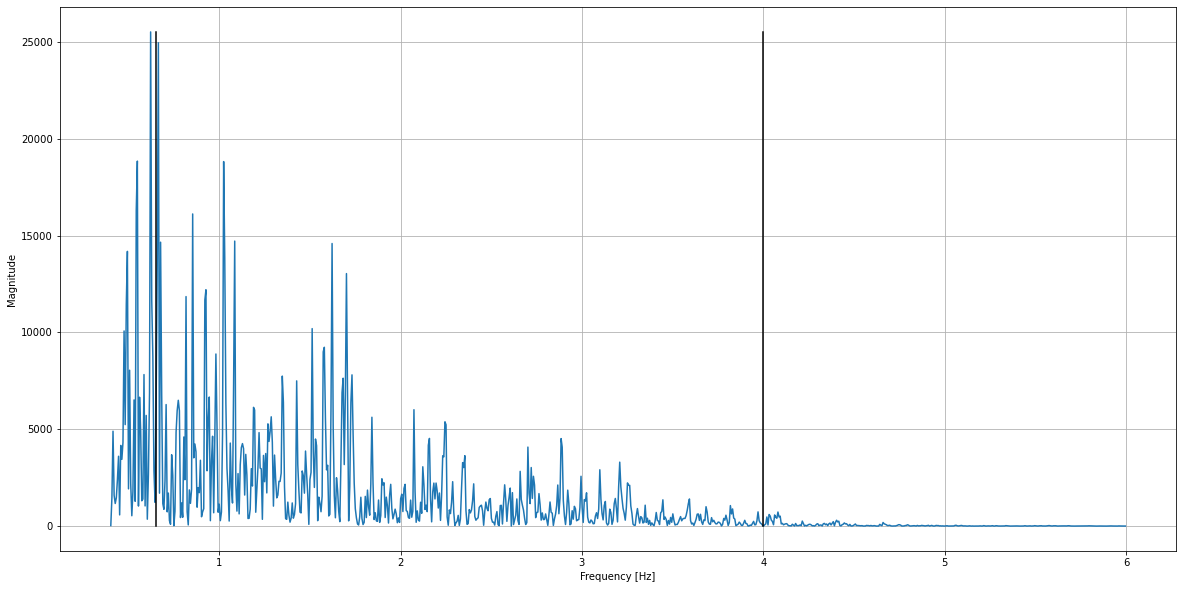

Mean Absolute Error: 44.30901548083792

----------------------------------------------------------
Experiment: P3LC2
Mixing Matrix
[[ 64.60954696   6.20335033 -22.75301007]
 [ 68.53136111 -15.12596702  -9.20961795]
 [ 58.37292652   6.31234281  35.13962908]]
Max Peak Source:  1
Max Peak Source:  0
PPG derived from Green_Source.
Incongruent Dimensions of the reference data.

----------------------------------------------------------
Experiment: P3LC3
Mixing Matrix
[[-68.82870843 -10.26499002  10.50186043]
 [-60.59658039 -30.21443067  24.3884292 ]
 [-24.23733429 -23.45013151  61.77629744]]
Max Peak Source:  1


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


Max Peak Source:  1
PPG derived from GRD_Source.


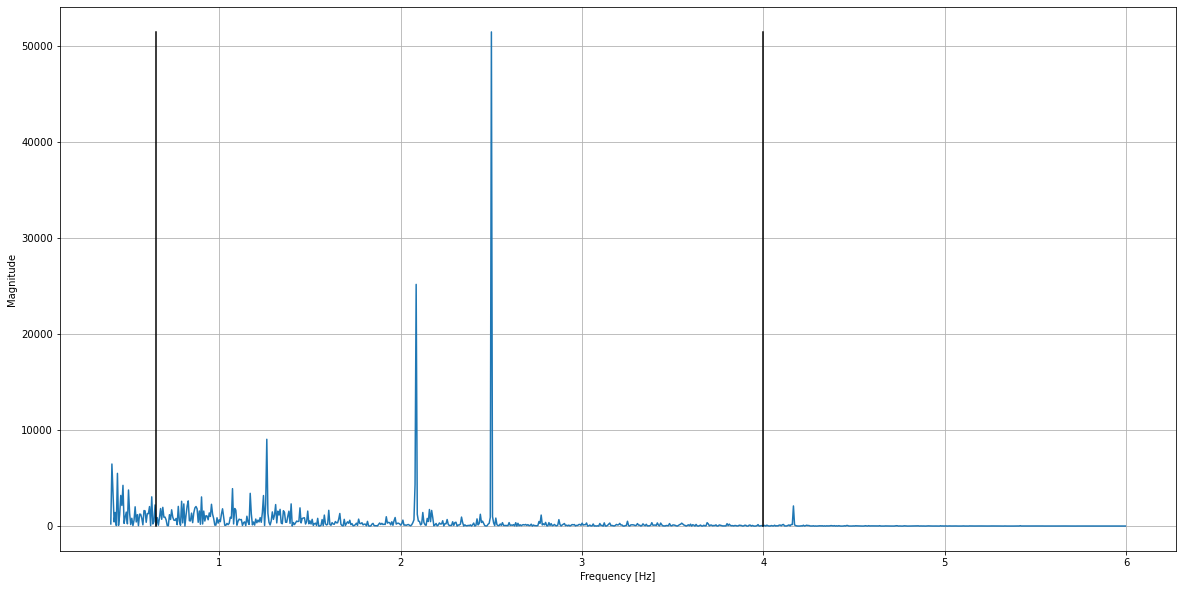

Mean Absolute Error: 63.75583969154529

----------------------------------------------------------
Experiment: P3LC4
Mixing Matrix
[[ 52.84451431  37.06326887 -31.16268886]
 [ 55.10978673  39.99153828 -22.6350061 ]
 [ 67.34853293  23.51004366 -11.9877845 ]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


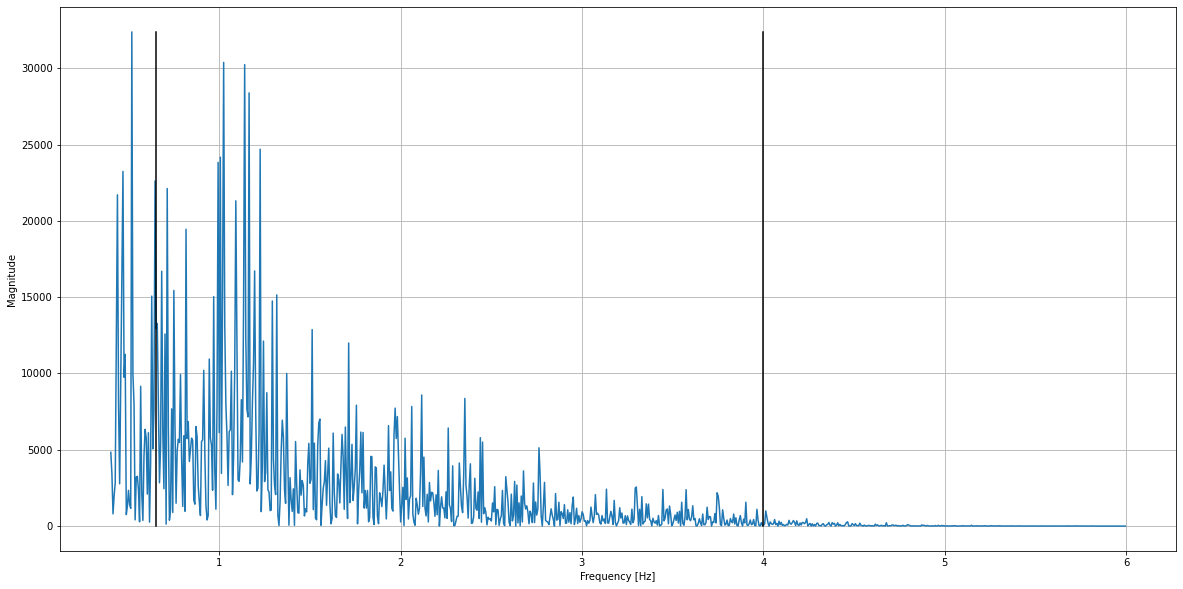

Mean Absolute Error: 43.318375435523684

----------------------------------------------------------
Experiment: P3LC5


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Mixing Matrix
[[  0.44428821 -66.60694365 -23.12314482]
 [-17.31389751 -60.14819011 -35.29411254]
 [ -7.23717734 -49.24614933 -49.03841187]]
Max Peak Source:  0
Max Peak Source:  0
PPG derived from Green_Source.


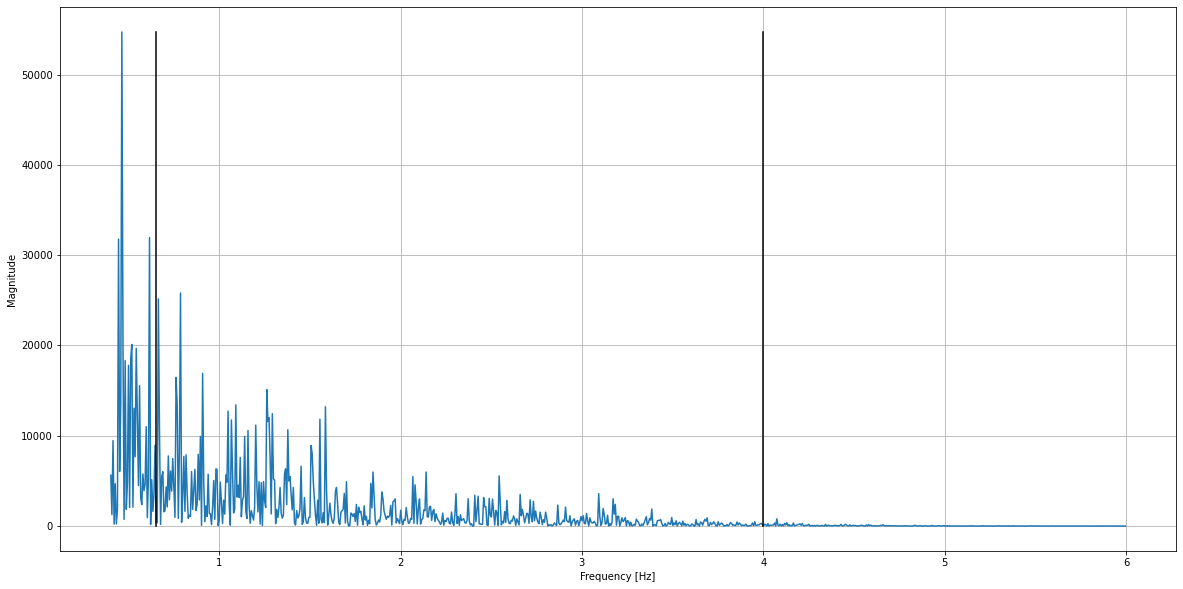

Mean Absolute Error: 40.99206406128135

##################### RESULTS #####################
Mean Absolute Error: 27.253645711695288
Pearson Correlation: 0.05901757525724892


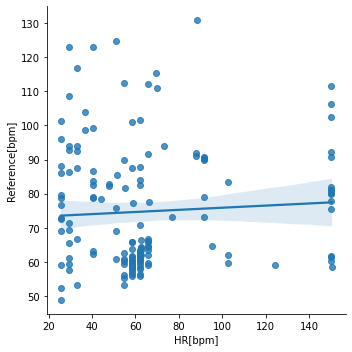

In [20]:
evaluate(
    lowpass_filter=True,
    n_points=3,
)


----------------------------------------------------------
Experiment: P1LC1
Mixing Matrix
[[23.45550044 42.58133048 45.55330576]
 [21.58665354 68.29798729 12.13170982]
 [49.14681269 44.68834706 -1.10323388]]
Max Peak Source:  0
Max Peak Source:  0


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


PPG derived from Green_Source.


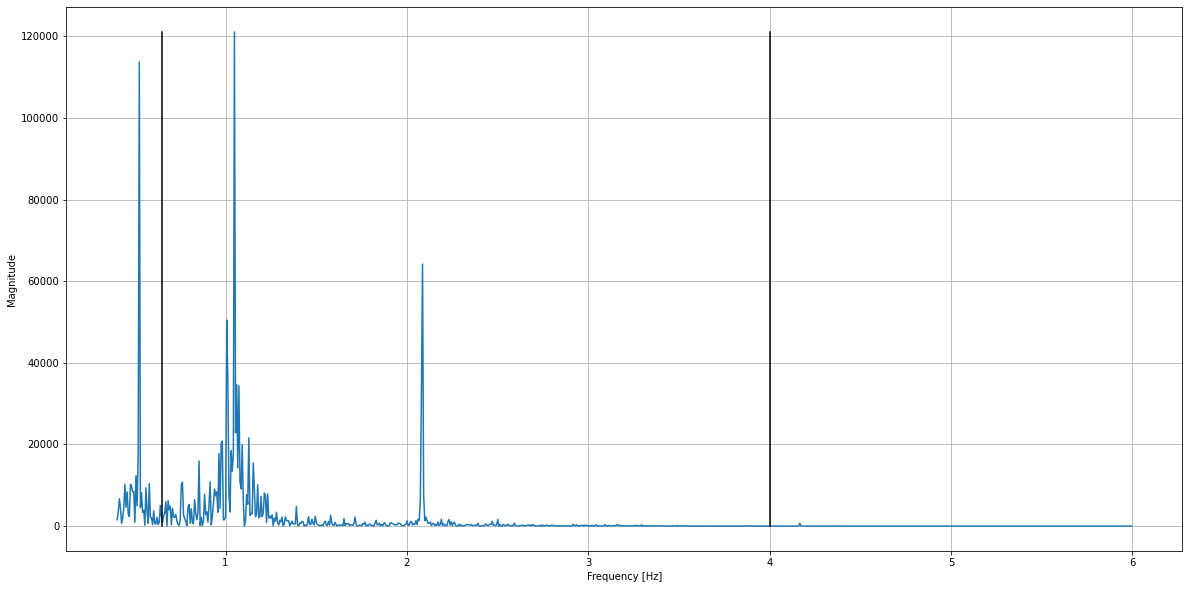

Mean Absolute Error: 7.7847154089058535

----------------------------------------------------------
Experiment: P1LC2
Mixing Matrix
[[ 11.15145498  23.94106251 -65.38552608]
 [ 46.18927736  39.28325984 -42.21799609]
 [  7.5527644   47.32713086 -47.26903693]]
Max Peak Source:  0
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


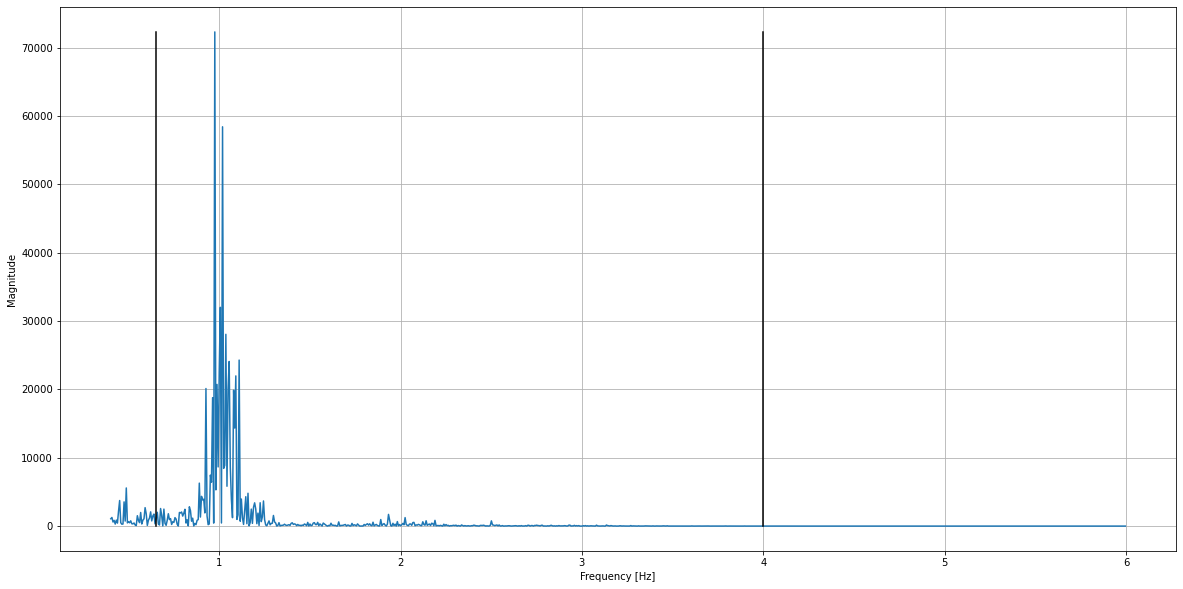

Mean Absolute Error: 2.2384802000317996

----------------------------------------------------------
Experiment: P1LC3
Mixing Matrix
[[ 46.80986184 -54.76282408  -9.84222852]
 [  2.91372347 -67.04725269 -30.45892034]
 [ 34.14574276 -40.74977057 -44.55651982]]
Max Peak Source:  1
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


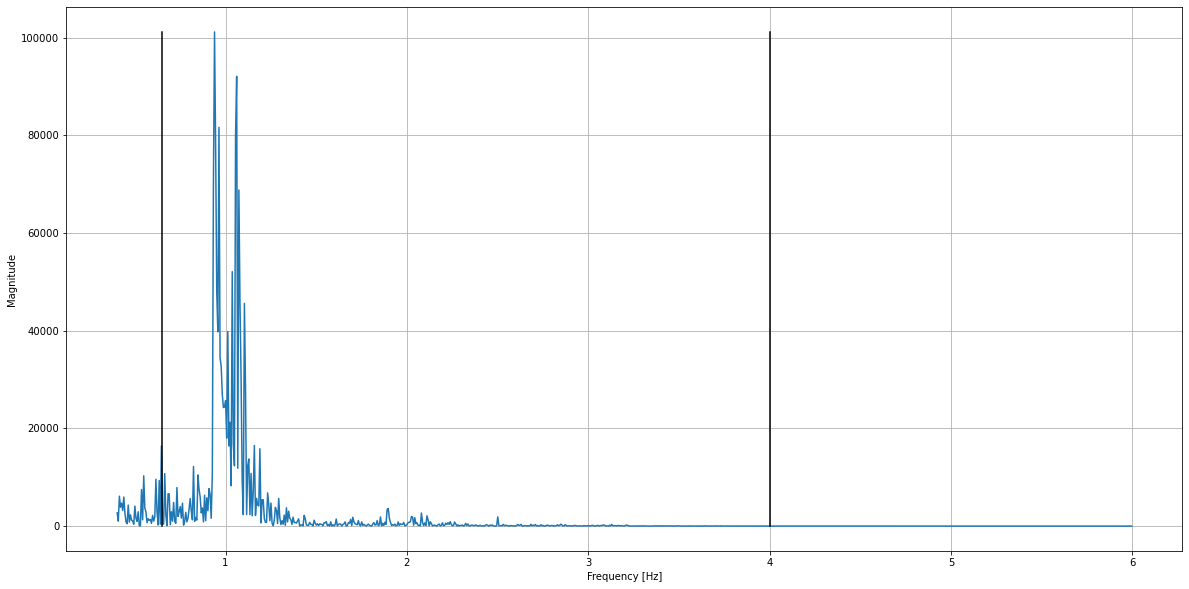

Mean Absolute Error: 2.2019854074606386

----------------------------------------------------------
Experiment: P1LC4
Mixing Matrix
[[-22.71438514 -46.11088448 -50.59423037]
 [-34.85547858  -7.56100463 -64.70873064]
 [  5.08624661  -9.6693794  -72.26215236]]
Max Peak Source:  0
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


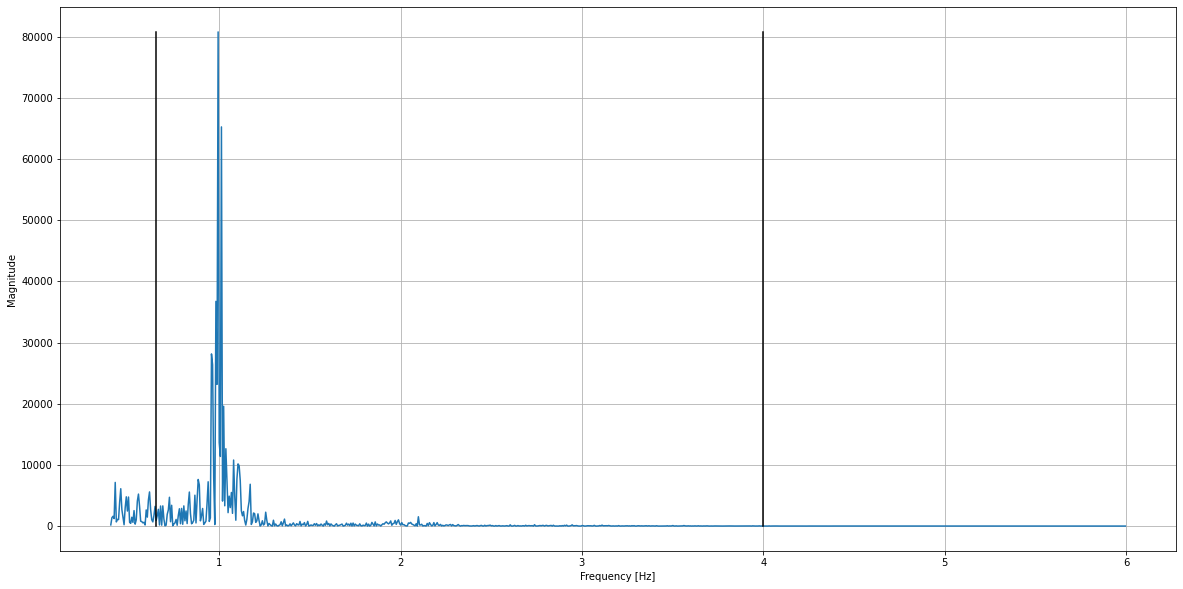

Mean Absolute Error: 1.3237784025918486

----------------------------------------------------------
Experiment: P1LC5
Mixing Matrix
[[-69.30043682  18.04314175  -6.83964546]
 [-47.97826801  -4.35835411 -55.7086036 ]
 [-41.91669983  51.09267774 -30.14801992]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


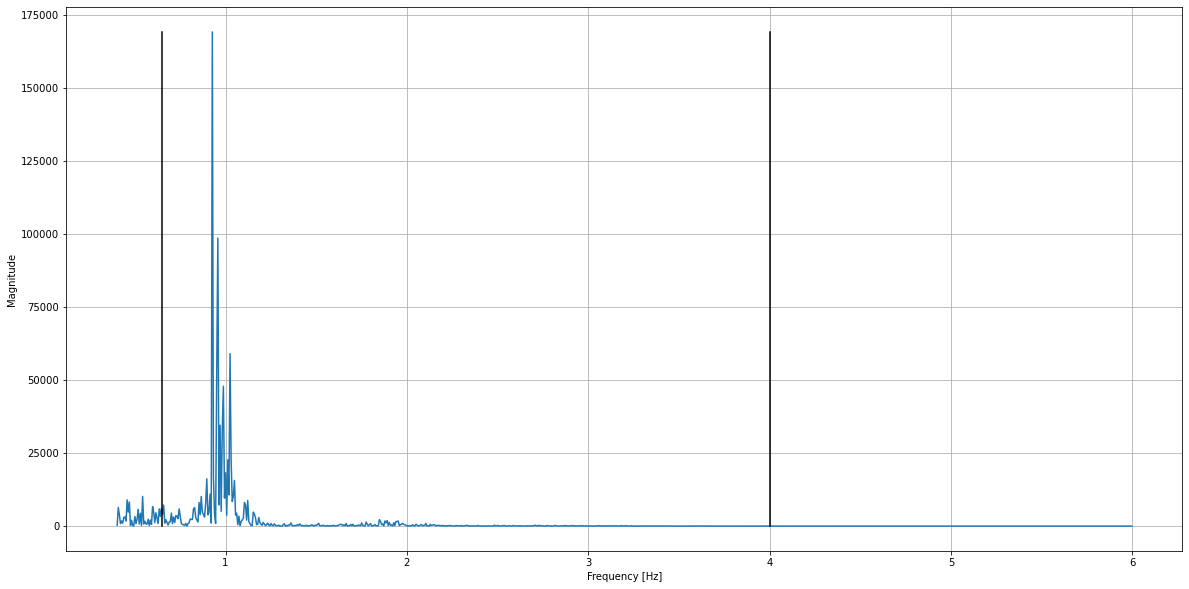

Mean Absolute Error: 1.237384454278984

----------------------------------------------------------
Experiment: P1LC6
Mixing Matrix
[[ 17.18298899  43.0009305   58.34285371]
 [-22.42772837 -47.89904594 -52.44588414]
 [-13.47368746 -45.50893669 -57.41982725]]
Max Peak Source:  1
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


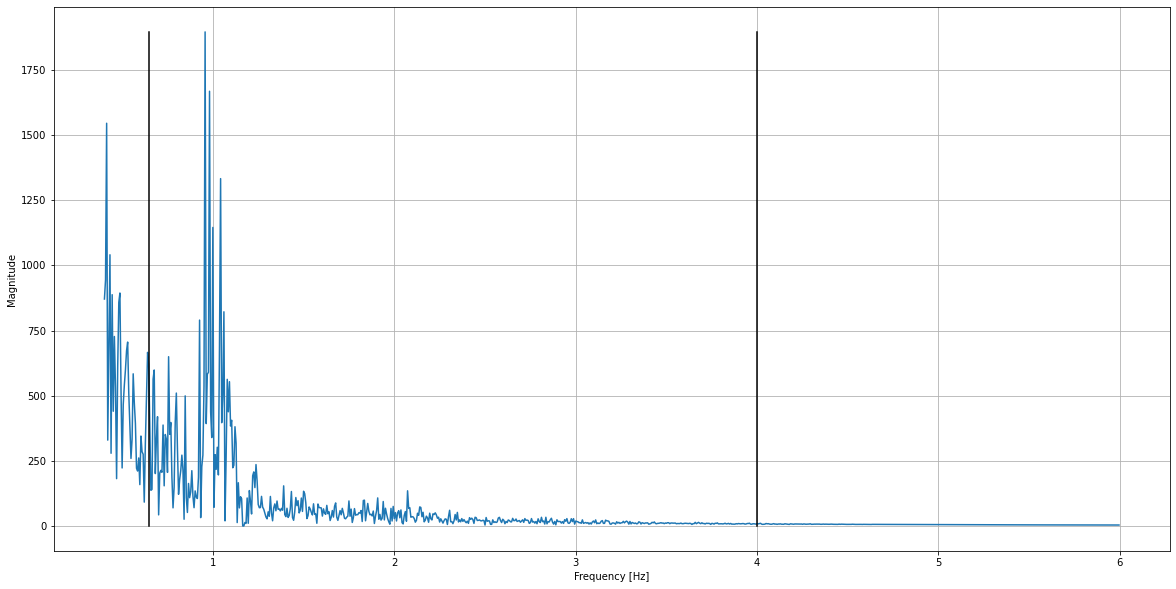

Mean Absolute Error: 4.411041444248845

----------------------------------------------------------
Experiment: P1LC7
Mixing Matrix
[[-56.16744305 -44.71727498  -8.23824946]
 [-53.07845573 -35.35935205 -37.06330701]
 [-41.55586244 -54.02534553 -24.25392411]]
Max Peak Source:  1
Max Peak Source:  0
PPG derived from Green_Source.
Incongruent Dimensions of the reference data.

----------------------------------------------------------
Experiment: P1M1
Mixing Matrix
[[ 47.6555336  -56.84344928  14.58803884]
 [ 55.37188806 -51.2784568    2.81548788]
 [ 52.18840415 -54.43928609  -5.08988747]]
Max Peak Source:  2


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


Max Peak Source:  0
PPG derived from Green_Source.
Incongruent Dimensions of the reference data.

----------------------------------------------------------
Experiment: P1M2
Mixing Matrix
[[-60.21938804  34.31744864 -12.18180867]
 [-57.54399085  31.20203014 -28.28796191]
 [-64.64921286  23.29261635 -20.60924457]]
Max Peak Source:  0
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


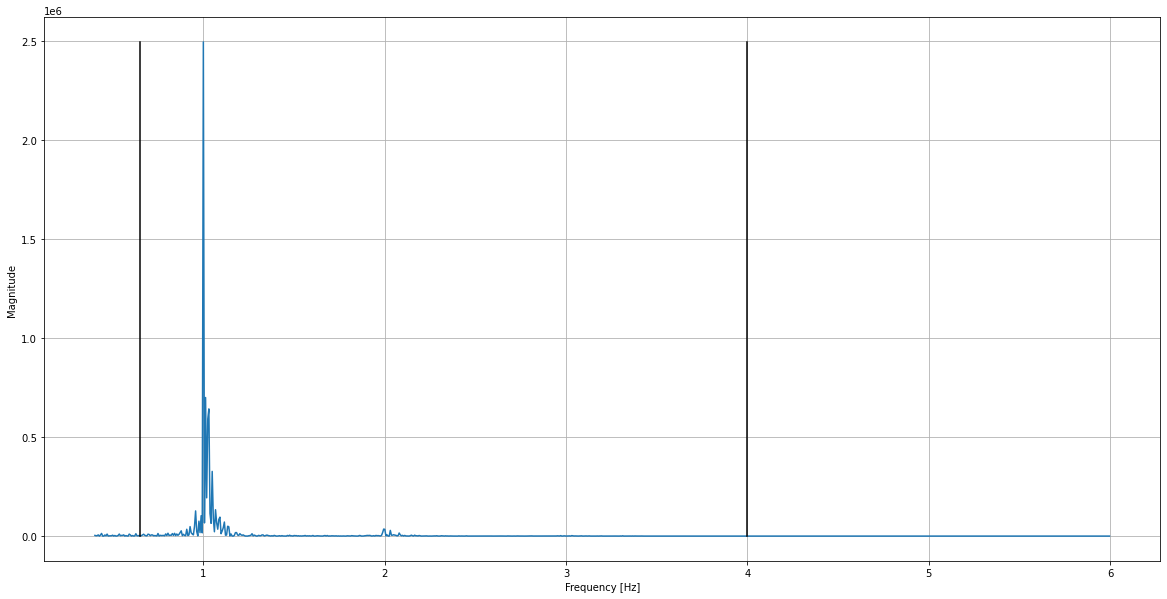

Mean Absolute Error: 21.696931299061813

----------------------------------------------------------
Experiment: P1M3
Mixing Matrix
[[-59.65978938 -32.00342918  -3.04417821]
 [-50.16213895 -42.76533371 -18.01597892]
 [-56.36347029 -30.43541067 -21.98918697]]
Max Peak Source:  0
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


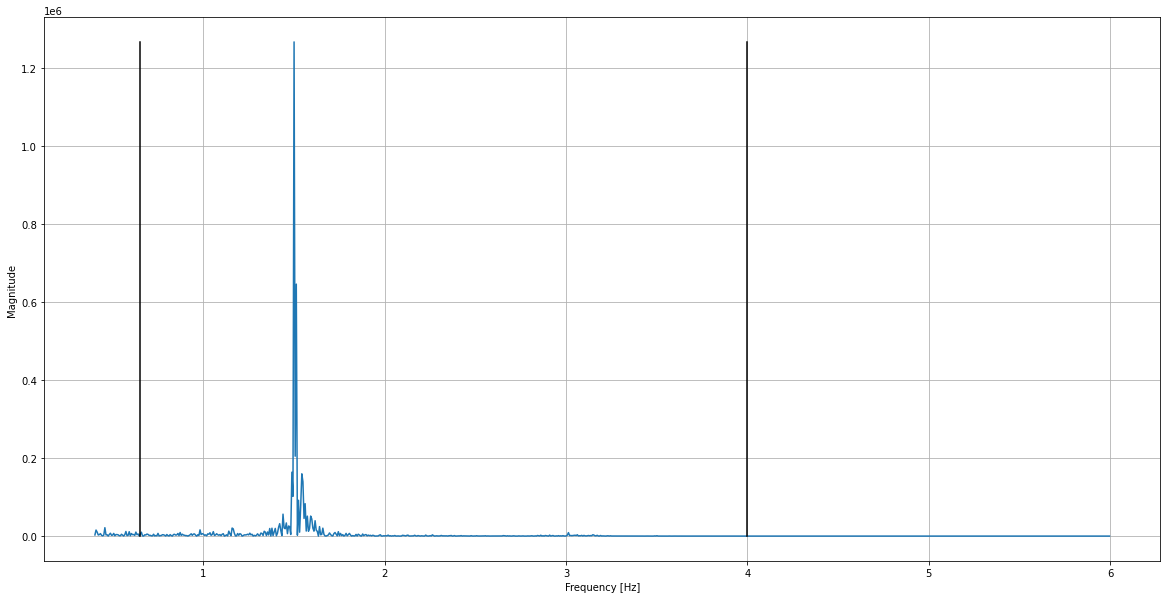

Mean Absolute Error: 8.613545843147968

----------------------------------------------------------
Experiment: P2LC1
Mixing Matrix
[[-72.38693306  -1.65896516   7.95492676]
 [-70.22701793  10.96120281  15.3790567 ]
 [-62.1085482    4.52842948  32.91088781]]
Max Peak Source:  1
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


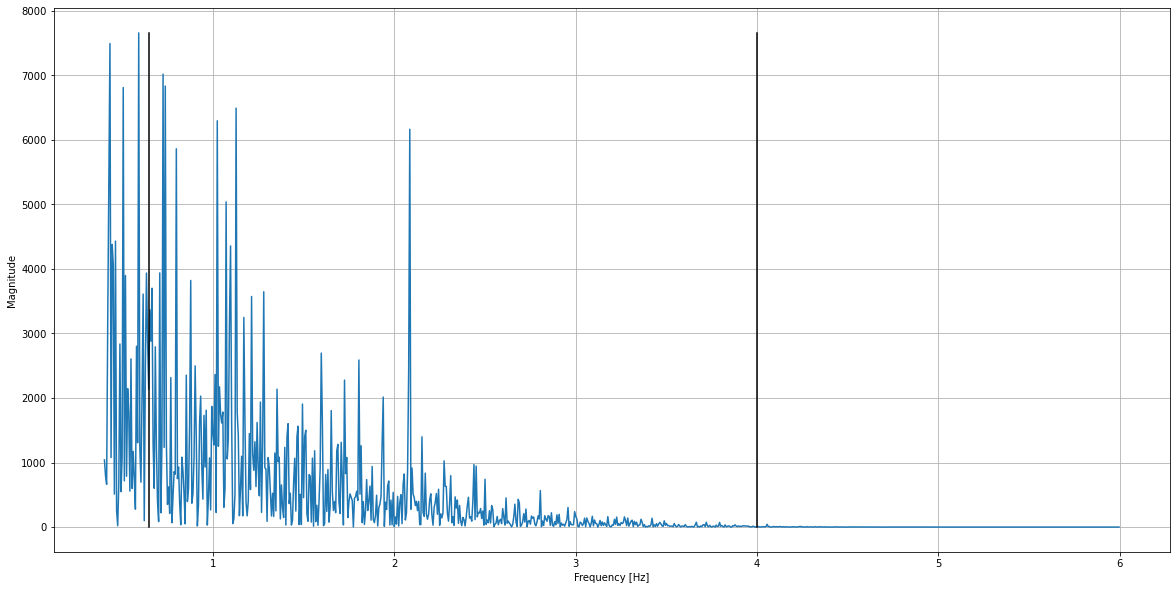

Mean Absolute Error: 40.4988885381578

----------------------------------------------------------
Experiment: P2LC2
Mixing Matrix
[[ 69.85818194   6.09757935  10.95621174]
 [ 64.85805957  27.15410899  -9.22166598]
 [ 61.87270852  -4.20514911 -19.35531004]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


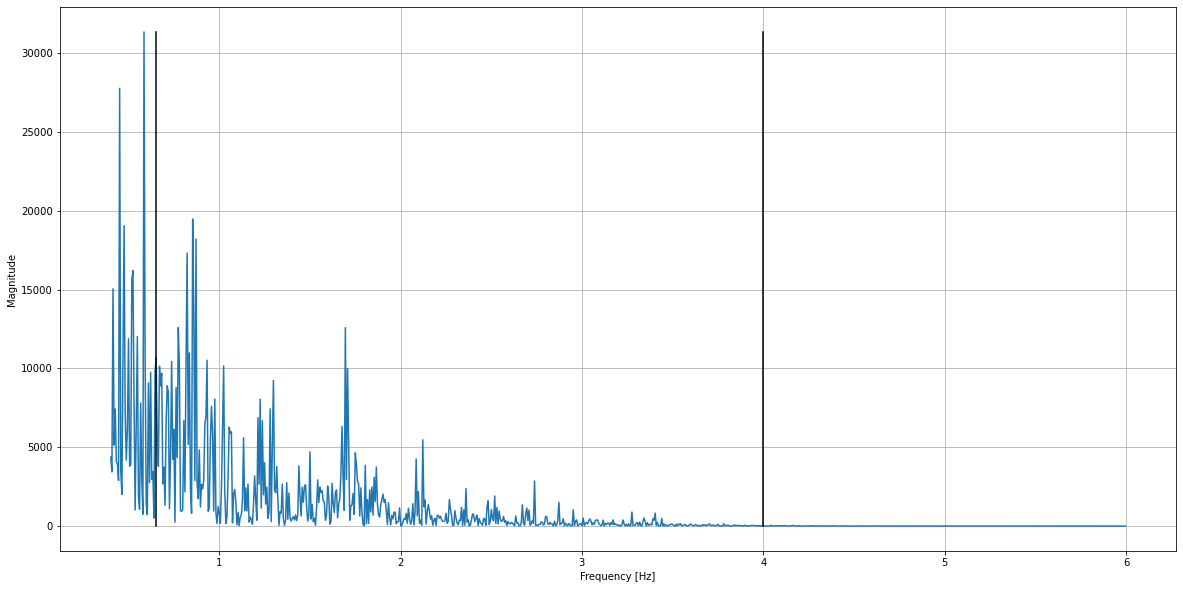

Mean Absolute Error: 40.65247313718883

----------------------------------------------------------
Experiment: P2LC3
Mixing Matrix
[[ 40.71962086 -11.30246262  59.60856076]
 [ 41.07343255 -24.77560468  54.90673768]
 [ 55.04631628 -20.93546303  39.41679064]]
Max Peak Source:  1
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


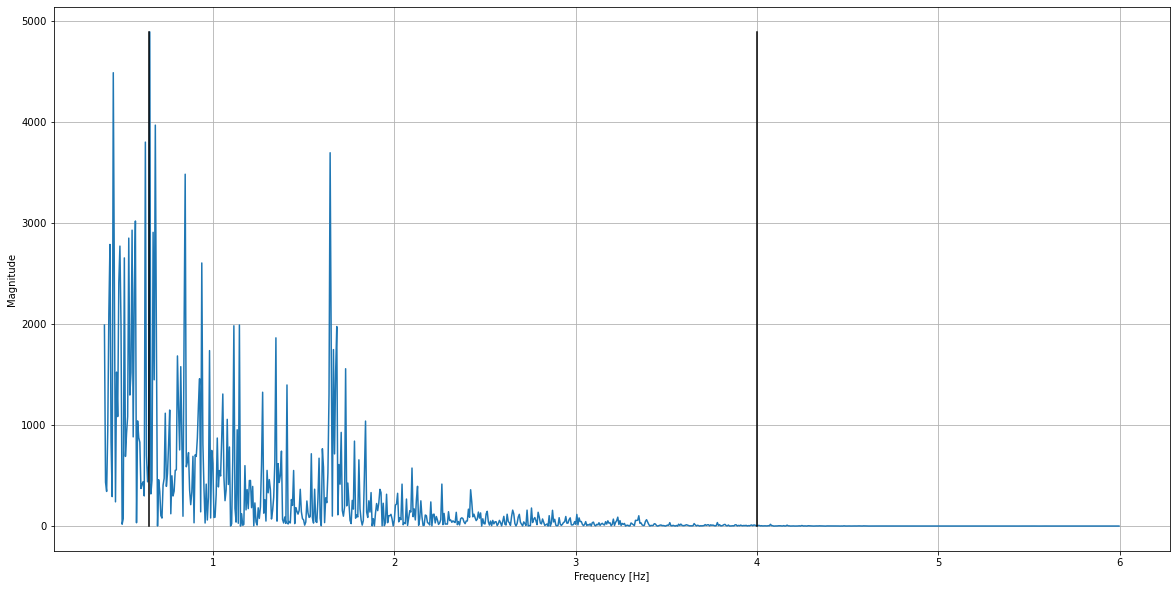

Mean Absolute Error: 54.07512326101577

----------------------------------------------------------
Experiment: P2LC4
Mixing Matrix
[[ 28.6959667   60.01962529  24.2516309 ]
 [ 39.70607405  46.24310693  32.76592739]
 [ 62.2548607    9.25661745 -10.42713284]]
Max Peak Source:  0
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


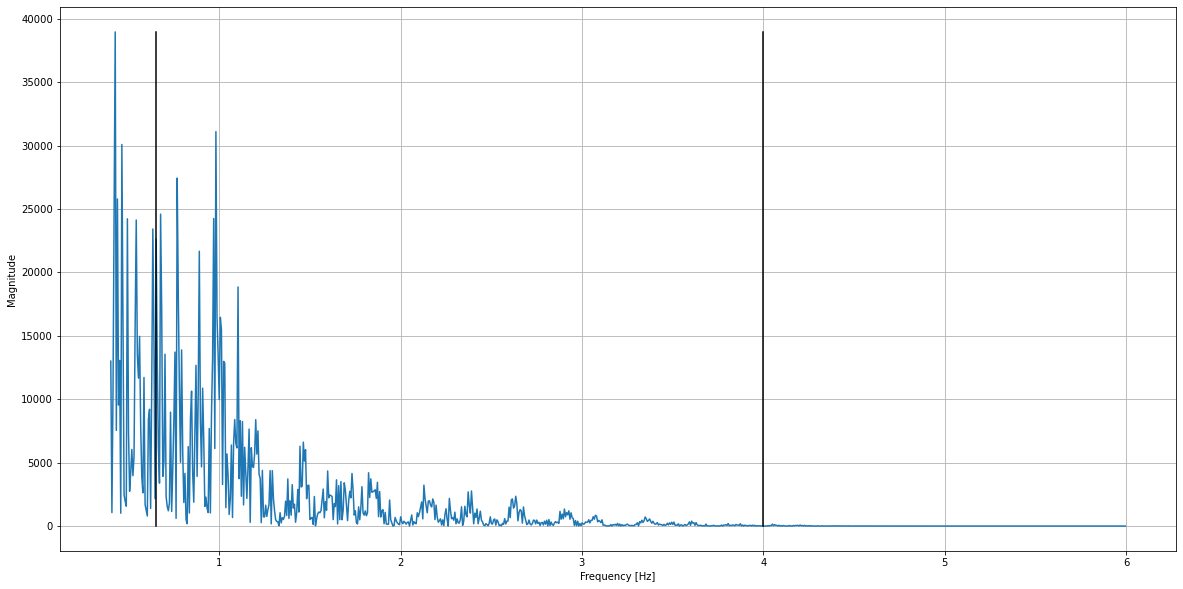

Mean Absolute Error: 36.92628997291068

----------------------------------------------------------
Experiment: P2LC5
Mixing Matrix
[[-53.81049257 -16.61135275  43.01509182]
 [-28.73151676 -38.34265717  51.70802498]
 [ -8.06938451 -62.13454532  35.17858389]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


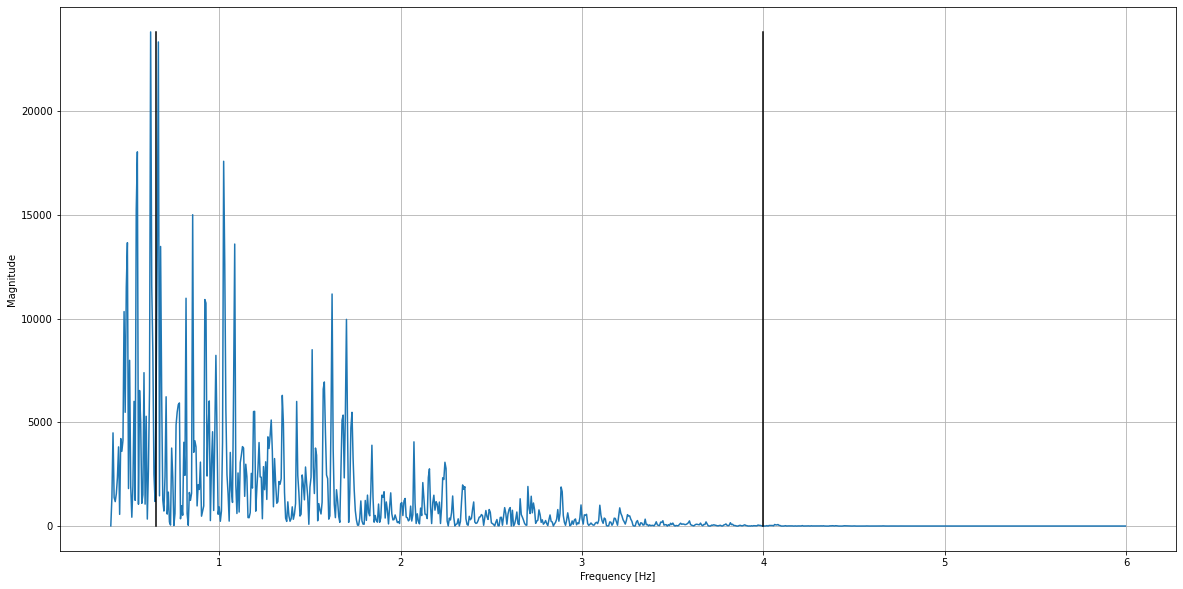

Mean Absolute Error: 48.549064700350115

----------------------------------------------------------
Experiment: P3LC2
Mixing Matrix
[[-22.99832439 -61.94364565  -8.4267296 ]
 [-10.61068418 -66.51252319  11.39432793]
 [ 34.47640985 -56.19402982  -6.16253531]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.
Incongruent Dimensions of the reference data.

----------------------------------------------------------
Experiment: P3LC3
Mixing Matrix
[[  9.34816133 -68.0877971   12.19506054]
 [ 23.39904566 -59.71243101  30.77846591]
 [ 60.7239389  -23.70458526  24.50799095]]


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.


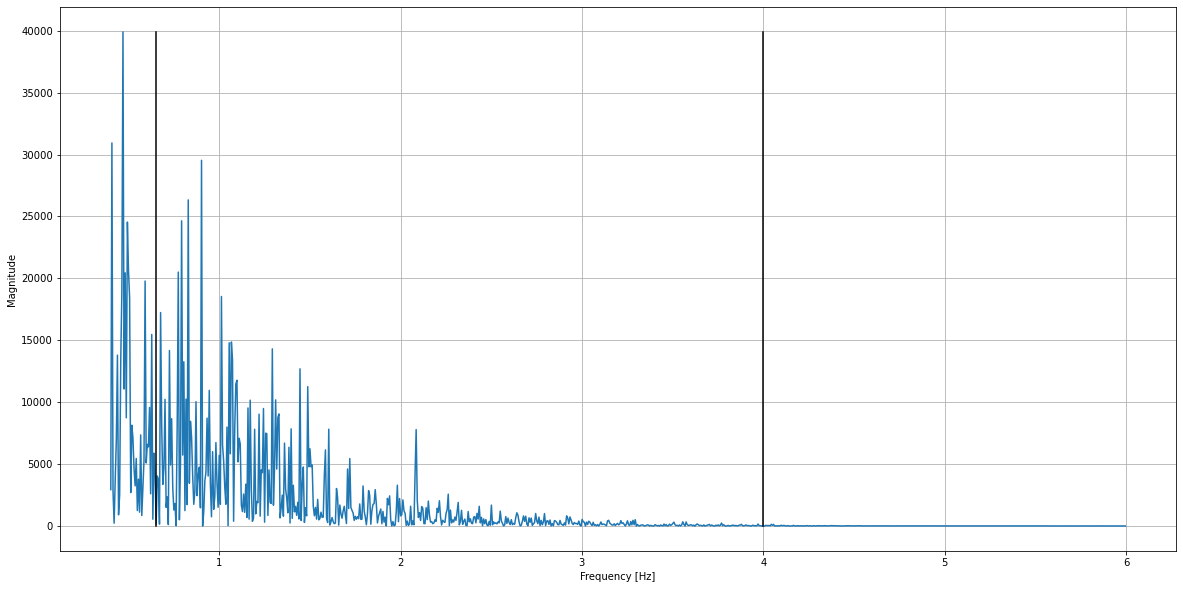

Mean Absolute Error: 35.07390153601402

----------------------------------------------------------
Experiment: P3LC4
Mixing Matrix
[[37.52766696 51.74835287 29.96323629]
 [40.01640545 53.94552247 21.69251084]
 [24.22596199 66.50030288 11.00353217]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


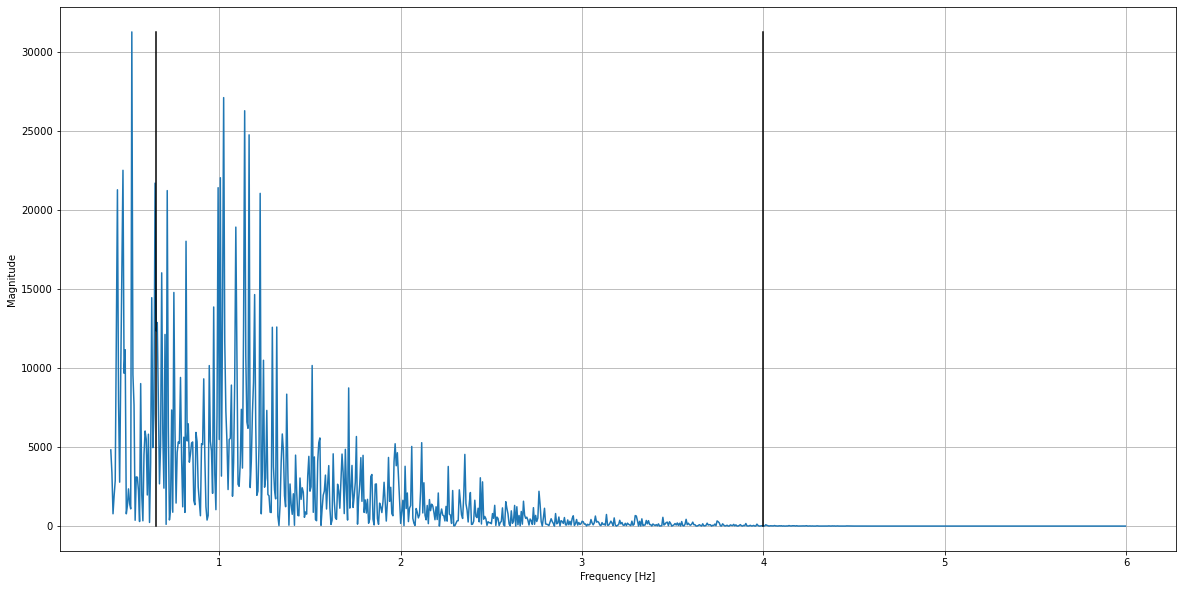

Mean Absolute Error: 46.24520470381636

----------------------------------------------------------
Experiment: P3LC5


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Mixing Matrix
[[23.06885929 65.59192409 -1.79869175]
 [38.58035787 58.48734709 11.09283799]
 [49.26287706 48.1062651  -0.61842834]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.


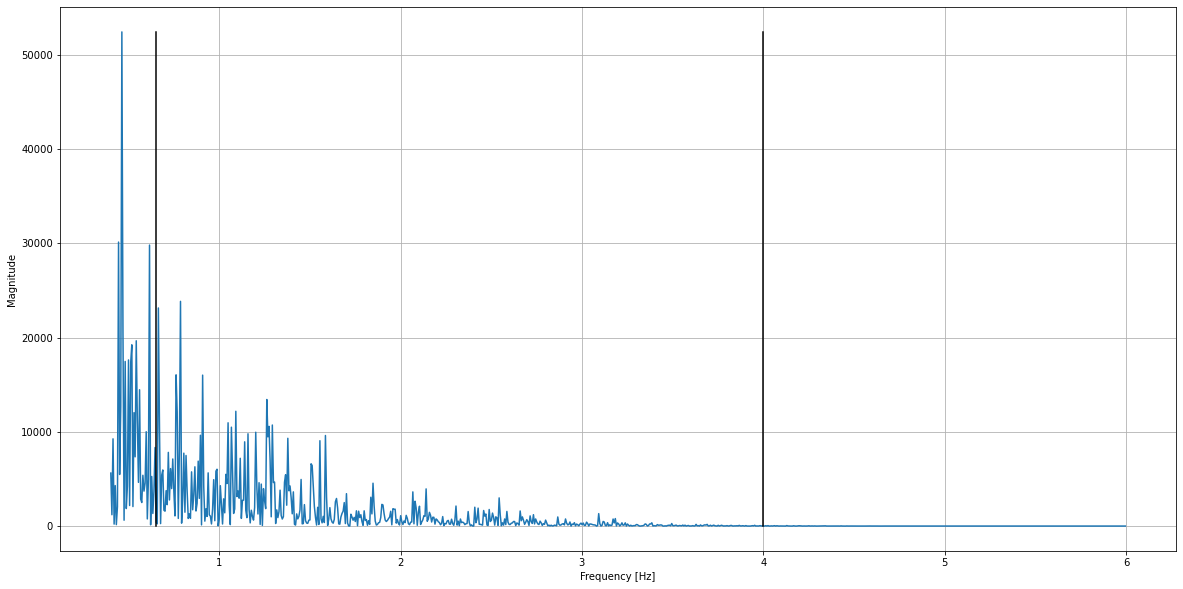

Mean Absolute Error: 43.81608584176915

##################### RESULTS #####################
Mean Absolute Error: 24.709055884434406
Pearson Correlation: -0.11683398885937832


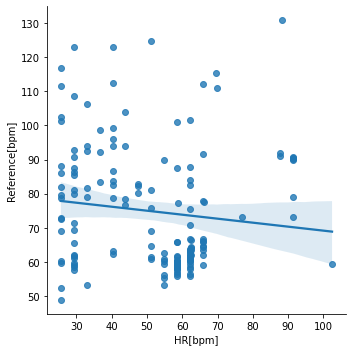

In [21]:
evaluate(
    lowpass_filter=True,
    n_points=6,
)


----------------------------------------------------------
Experiment: P1LC1
Mixing Matrix
[[ 43.3258785  -22.07580943 -43.17856804]
 [ 10.72282723 -21.34822261 -67.62615748]
 [ -1.29491245 -47.22859277 -44.70740276]]
Max Peak Source:  1
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


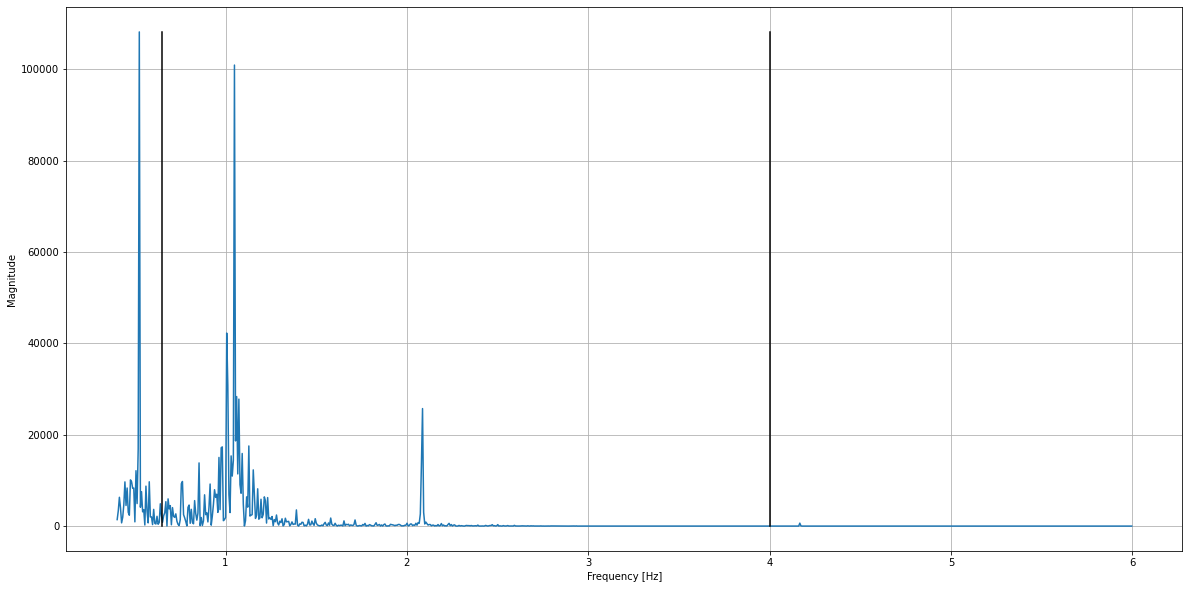

Mean Absolute Error: 7.7847154089058535

----------------------------------------------------------
Experiment: P1LC2


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


Mixing Matrix
[[10.86974659 24.92499824 64.33770835]
 [45.4570631  40.10613012 41.47531557]
 [ 7.27093579 47.32044458 46.50146316]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.


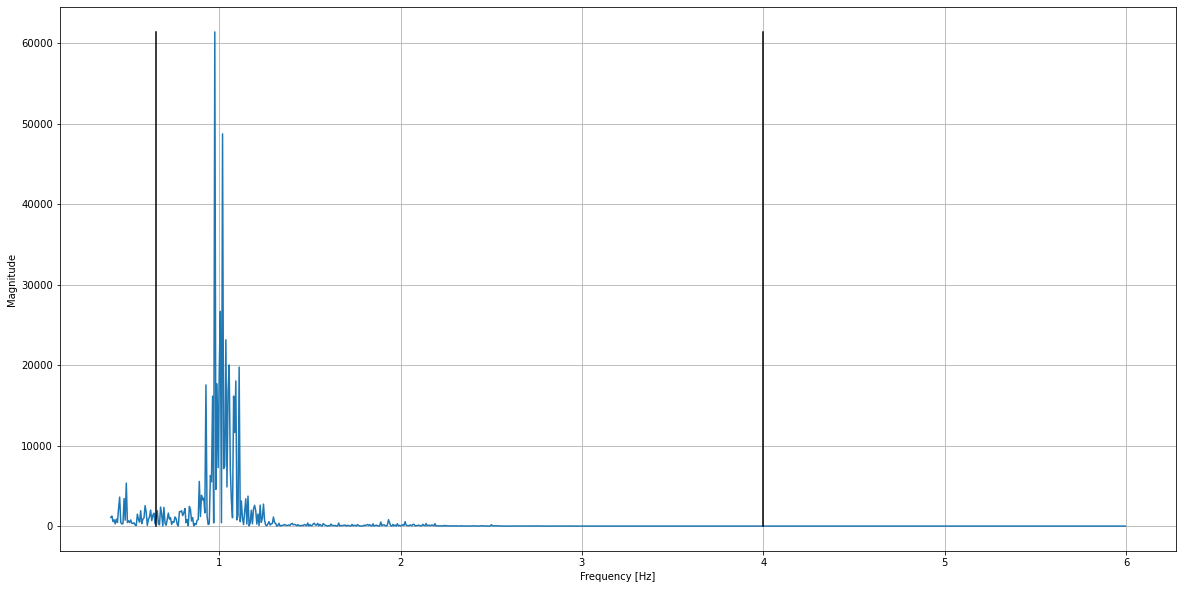

Mean Absolute Error: 2.2384802000317996

----------------------------------------------------------
Experiment: P1LC3
Mixing Matrix
[[55.00955741 45.90416474 10.09785052]
 [66.14083037  2.37914977 30.03037169]
 [41.0111357  33.22559507 44.19605063]]
Max Peak Source:  0
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


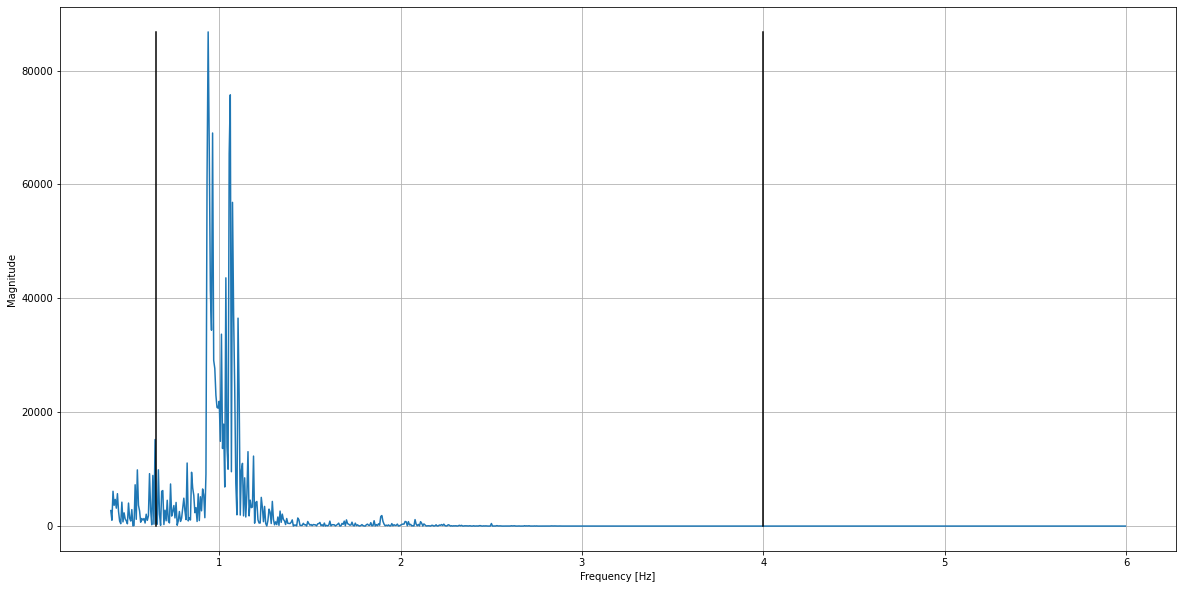

Mean Absolute Error: 2.2019854074606386

----------------------------------------------------------
Experiment: P1LC4
Mixing Matrix
[[ 43.2340772   51.85057382 -23.8883667 ]
 [  4.4114927   64.98206469 -34.13170924]
 [  7.90093813  72.30407581   5.38858342]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


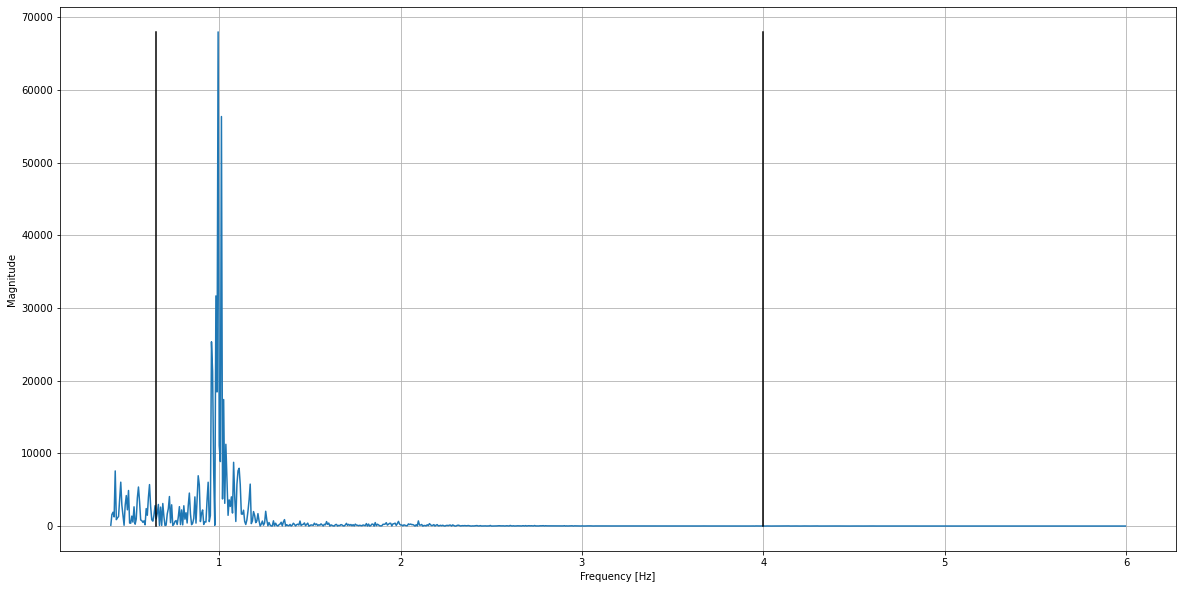

Mean Absolute Error: 1.3237784025918486

----------------------------------------------------------
Experiment: P1LC5
Mixing Matrix
[[-68.66349126 -17.16135331   8.84983473]
 [-45.8271209    4.37645584  56.72726438]
 [-41.64517978 -50.6419422   30.82841638]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


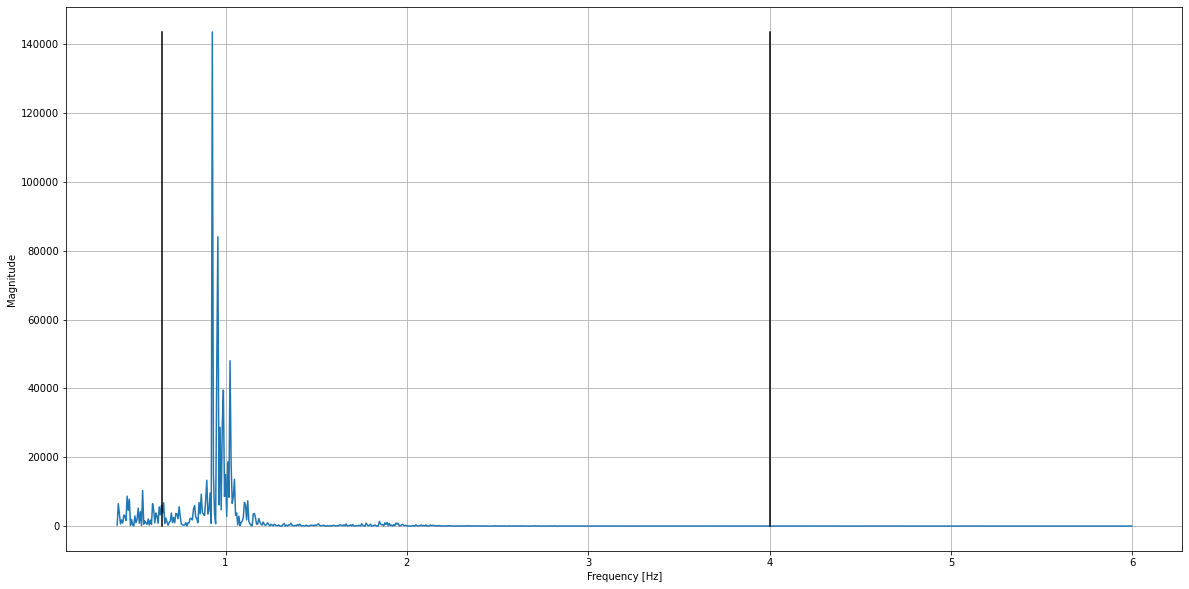

Mean Absolute Error: 1.3205527672871136

----------------------------------------------------------
Experiment: P1LC6
Mixing Matrix
[[-43.31770055 -57.95222979  17.61973266]
 [ 48.04477723  52.09111889 -22.86146566]
 [ 45.8047178   57.05048395 -13.93177038]]
Max Peak Source:  0
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


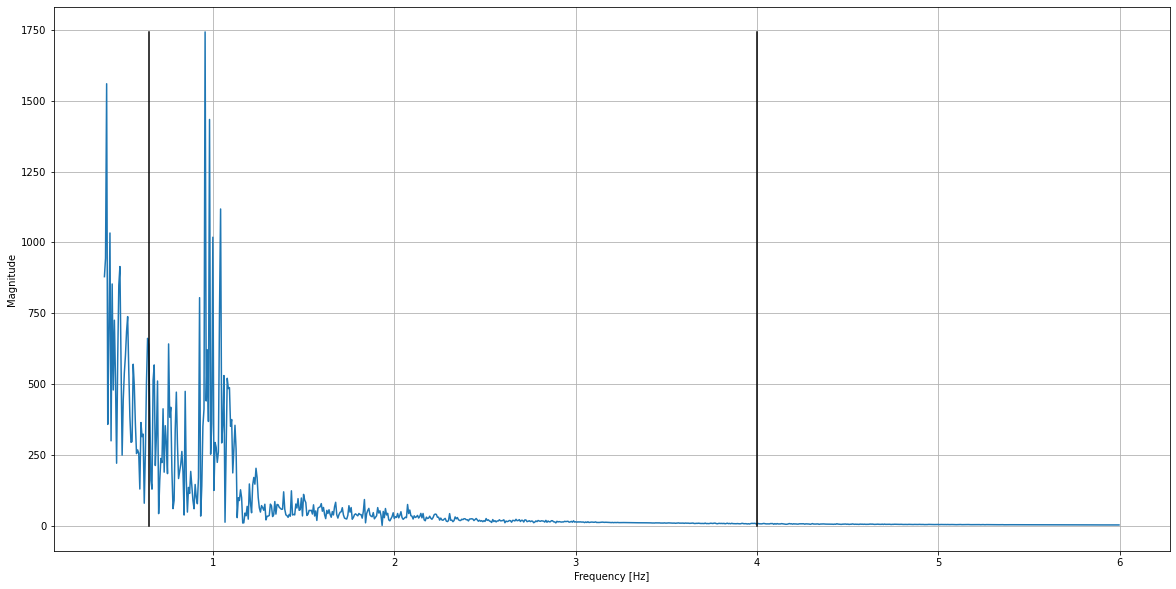

Mean Absolute Error: 7.151461659695997

----------------------------------------------------------
Experiment: P1LC7
Mixing Matrix
[[-44.54491044  55.76561545   8.58082627]
 [-35.47705291  52.61427893  36.84036939]
 [-53.84876415  41.47258839  24.16343224]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.
Incongruent Dimensions of the reference data.

----------------------------------------------------------
Experiment: P1M1


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


Mixing Matrix
[[-46.87979155 -14.70999071  56.60139075]
 [-54.35034338  -3.2099991   51.3403303 ]
 [-51.24445857   4.47898916  54.52214249]]
Max Peak Source:  1
Max Peak Source:  0
PPG derived from Green_Source.
Incongruent Dimensions of the reference data.

----------------------------------------------------------
Experiment: P1M2
Mixing Matrix
[[ 24.4930288  -29.6010737   53.27377837]
 [ 38.93980934 -29.89887275  45.9311751 ]
 [ 30.57399466 -39.01408625  46.09913934]]


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


Max Peak Source:  1
Max Peak Source:  0
PPG derived from Green_Source.


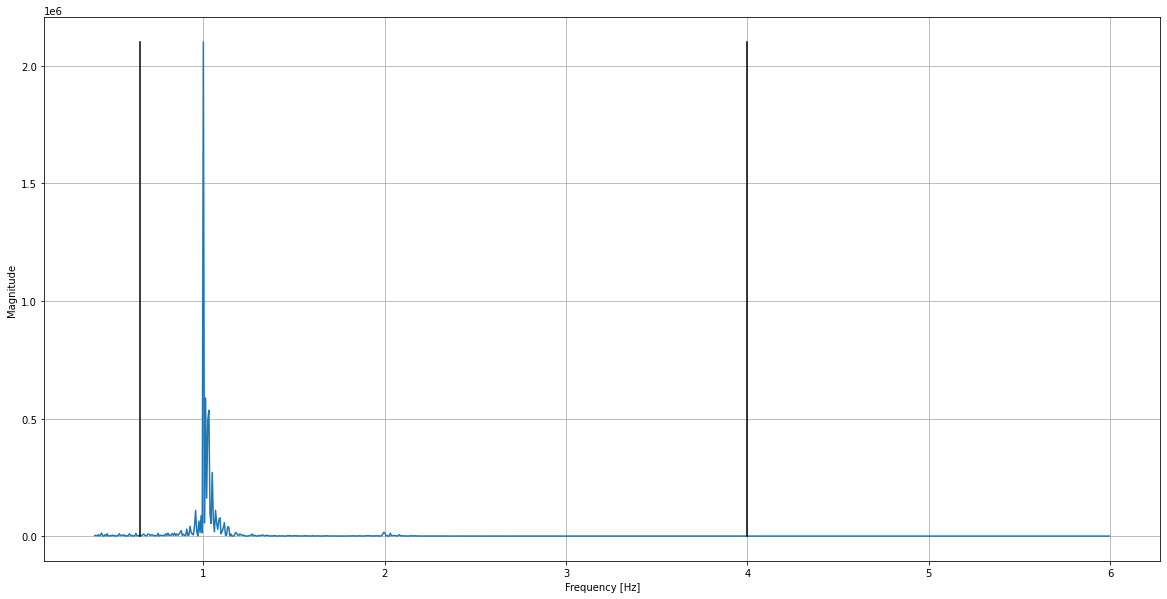

Mean Absolute Error: 21.696931299061813

----------------------------------------------------------
Experiment: P1M3
Mixing Matrix
[[  6.22745134  44.83591702  42.49441376]
 [ -2.21597627  56.41374383  28.95203226]
 [-10.09476207  48.80142389  36.87795872]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


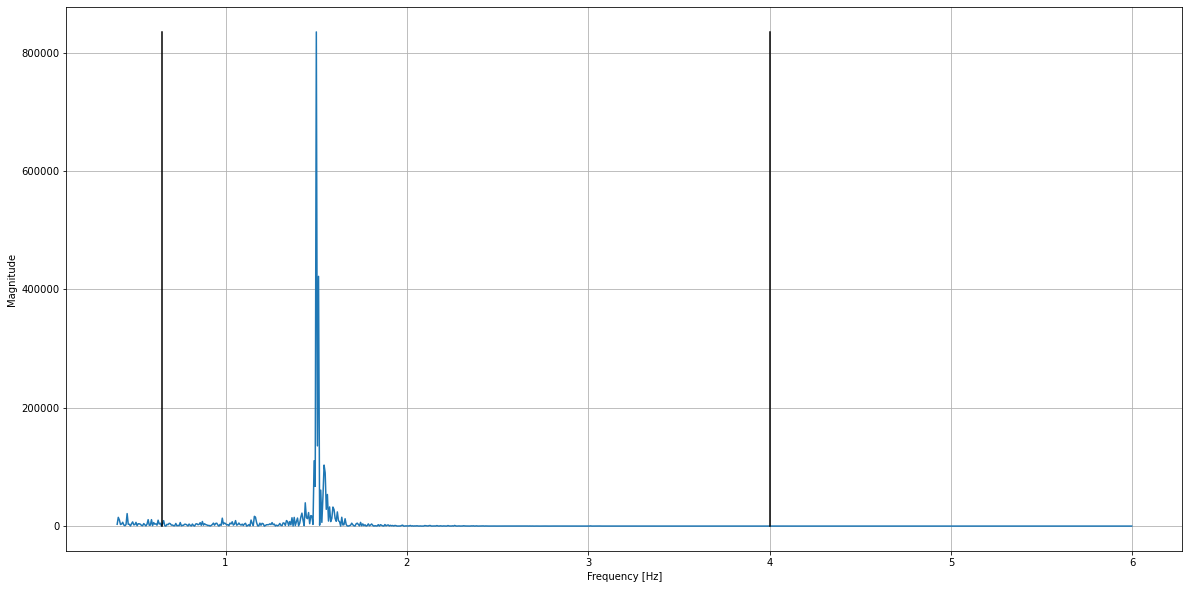

Mean Absolute Error: 8.613545843147968

----------------------------------------------------------
Experiment: P2LC1
Mixing Matrix
[[ 3.14505610e-02 -7.20100133e+01  8.46581089e+00]
 [-1.28722458e+01 -6.98381978e+01  1.32825083e+01]
 [-1.04651216e+01 -6.16719172e+01  3.04557941e+01]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


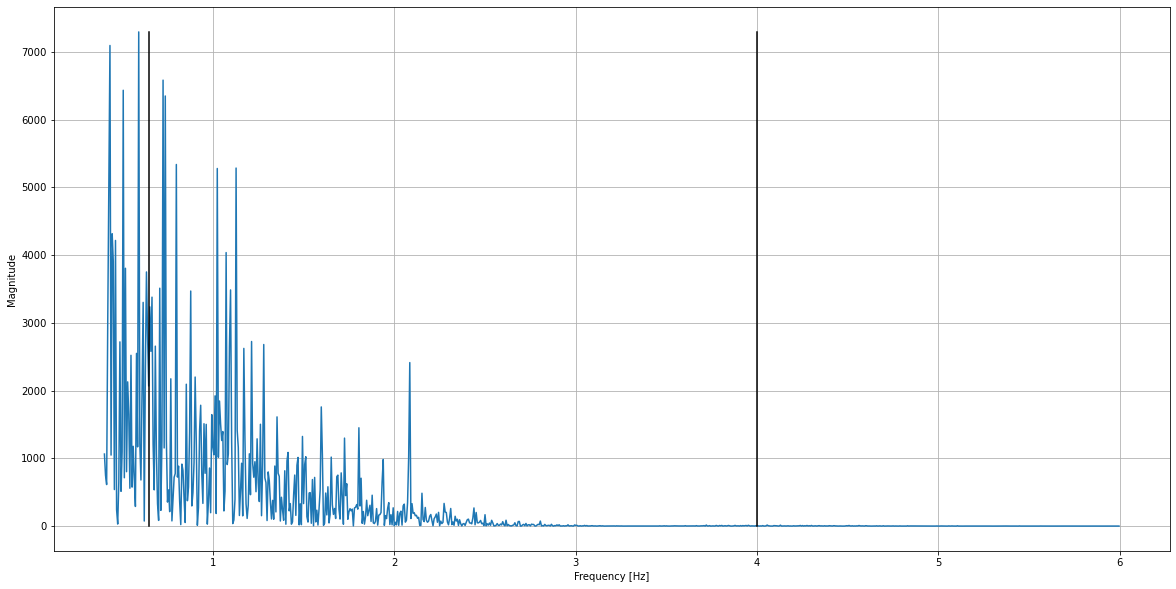

Mean Absolute Error: 40.4988885381578

----------------------------------------------------------
Experiment: P2LC2
Mixing Matrix
[[ -6.5935974   69.10090686 -12.05575279]
 [-27.02983099  64.26363779   7.33292543]
 [  3.30042024  61.14880934  16.51171249]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


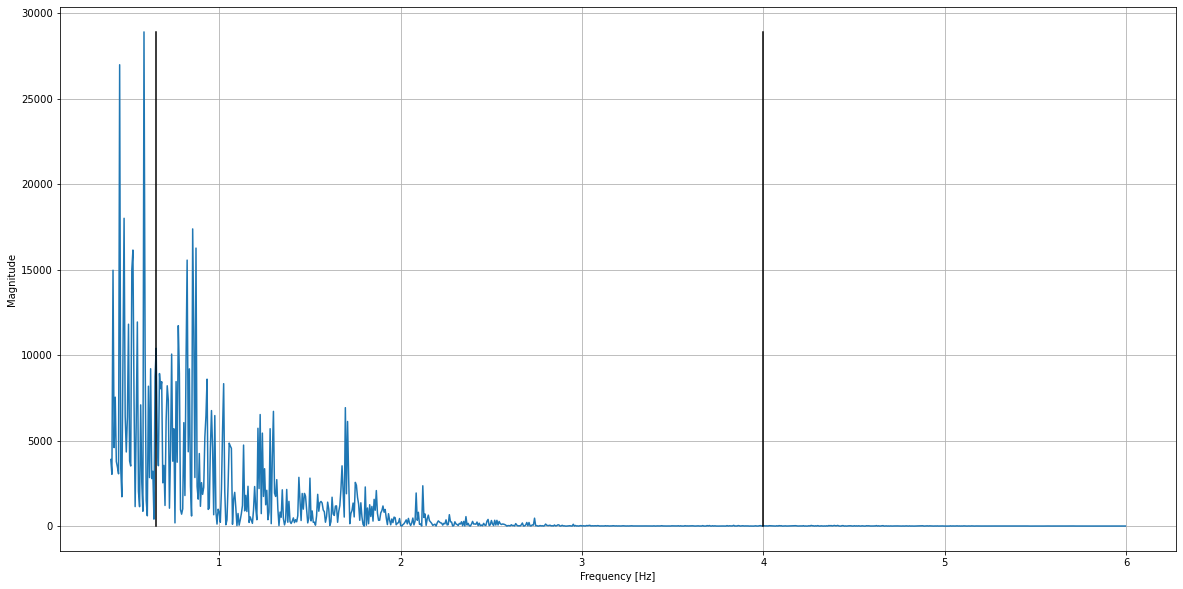

Mean Absolute Error: 42.11588777133517

----------------------------------------------------------
Experiment: P2LC3
Mixing Matrix
[[ 10.59148394 -39.7302843  -60.21265328]
 [ 23.62940903 -40.25053568 -55.70467179]
 [ 19.5737996  -53.78891141 -40.83255628]]
Max Peak Source:  0
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


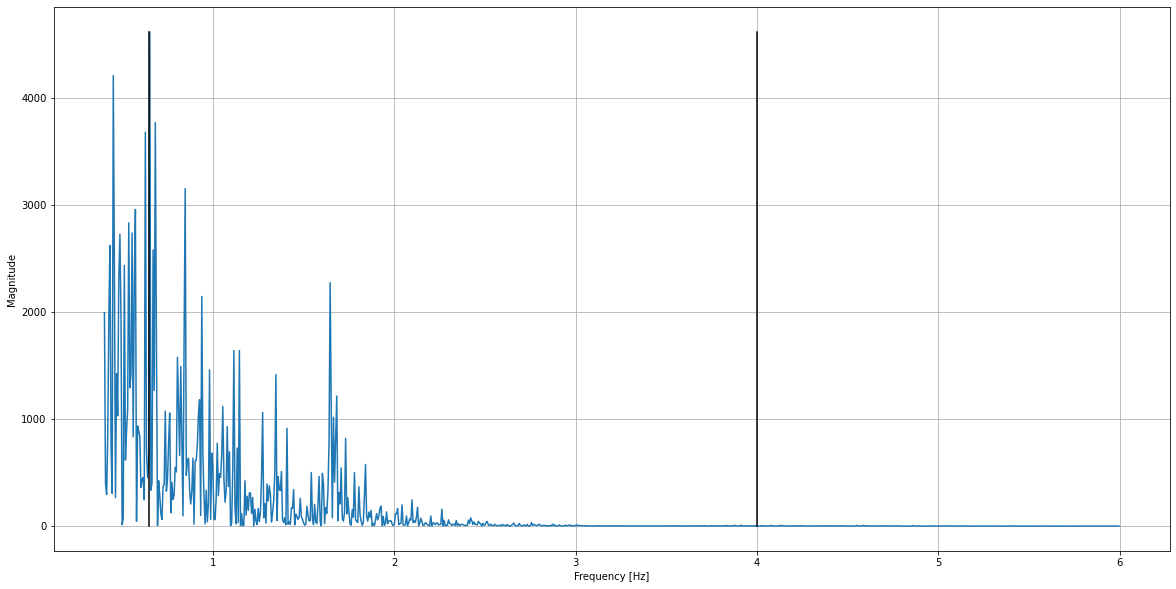

Mean Absolute Error: 52.813037854511705

----------------------------------------------------------
Experiment: P2LC4
Mixing Matrix
[[ 24.59765813  27.20714196 -59.77399654]
 [ 32.86490393  37.79384346 -46.16476592]
 [-10.4442083   59.76799226  -9.52876636]]
Max Peak Source:  1
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


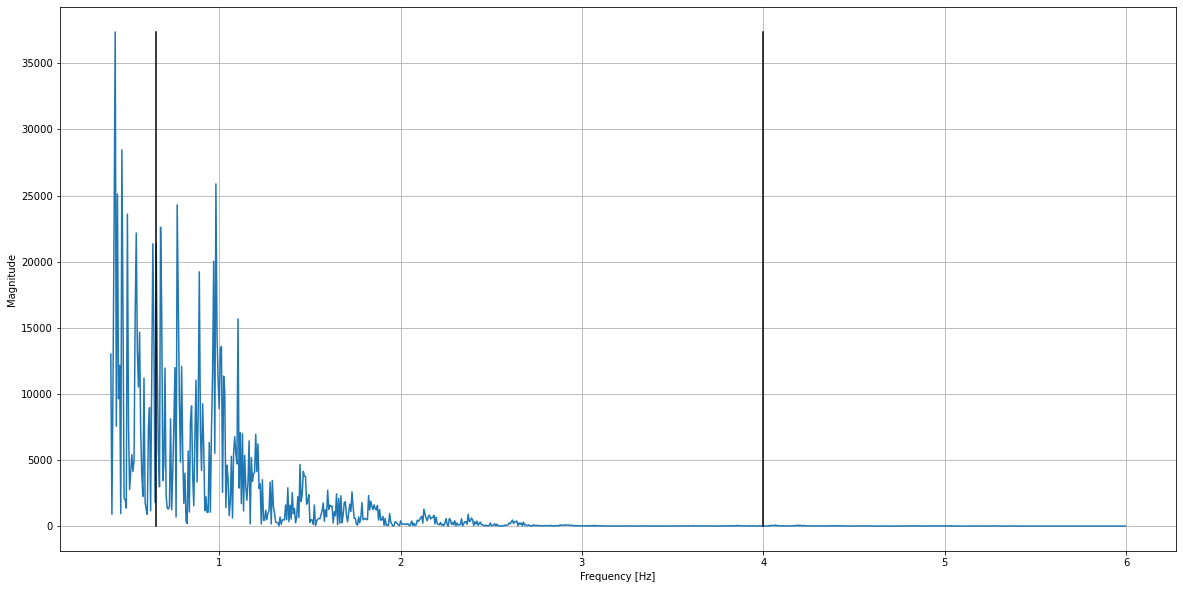

Mean Absolute Error: 36.92628997291068

----------------------------------------------------------
Experiment: P2LC5
Mixing Matrix
[[ 42.06230176 -53.67827377  16.65417788]
 [ 50.34115888 -28.92011014  38.62586637]
 [ 33.83488011  -8.40146888  62.34771892]]
Max Peak Source:  0
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


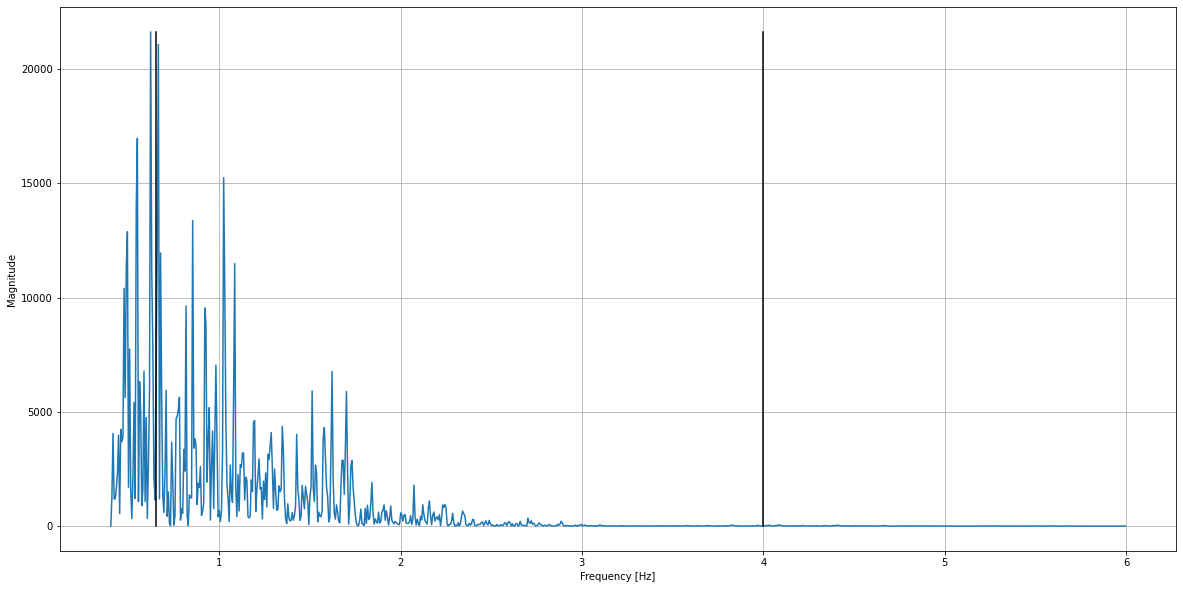

Mean Absolute Error: 50.74418665156963

----------------------------------------------------------
Experiment: P3LC2
Mixing Matrix
[[-59.69041533   6.2956112  -23.46965397]
 [-63.88469804 -11.57583069 -10.96846814]
 [-54.22379466   5.43805401  33.69127844]]
Max Peak Source:  1
Max Peak Source:  0
PPG derived from Green_Source.
Incongruent Dimensions of the reference data.

----------------------------------------------------------
Experiment: P3LC3


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


Mixing Matrix
[[  9.29805265 -13.6897746   67.2032923 ]
 [ 23.35527643 -31.06695282  58.55739525]
 [ 60.11646112 -25.34895569  22.29214684]]
Max Peak Source:  1
Max Peak Source:  0
PPG derived from Green_Source.


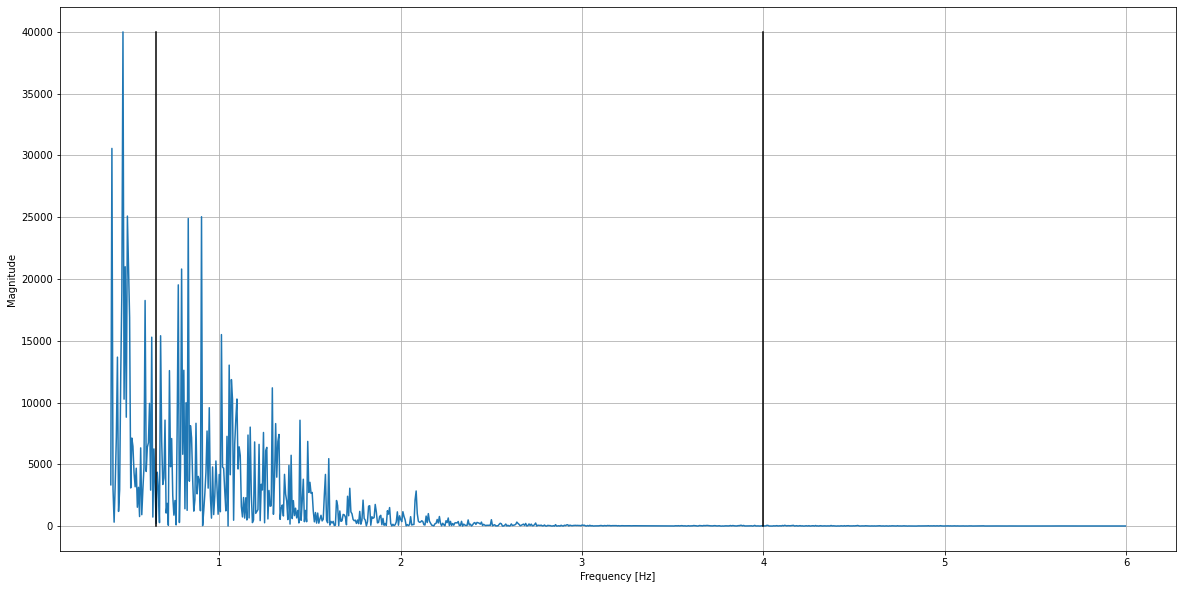

Mean Absolute Error: 37.269023487233525

----------------------------------------------------------
Experiment: P3LC4
Mixing Matrix
[[51.51006111 28.63113147 36.97885121]
 [53.64824496 20.53540935 39.05139476]
 [66.18296283  9.8432748  23.60016615]]
Max Peak Source:  2
Max Peak Source:  0
PPG derived from Green_Source.


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


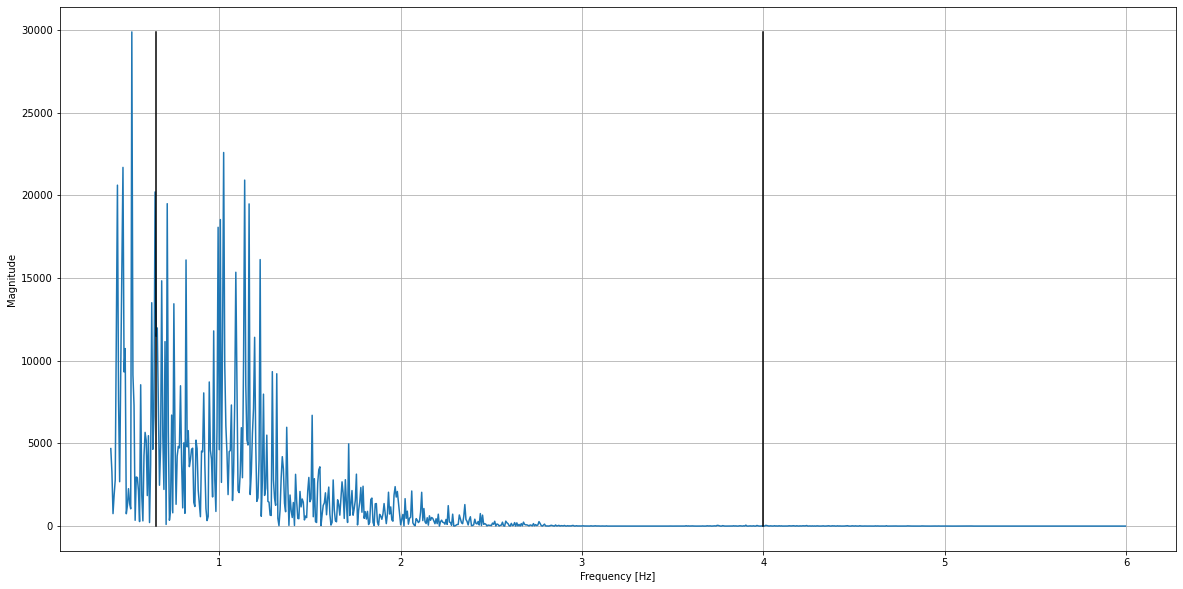

Mean Absolute Error: 46.24520470381636

----------------------------------------------------------
Experiment: P3LC5
Mixing Matrix
[[  3.55870369 -23.144754    64.54082952]
 [ 17.32400066 -36.54113388  57.16069786]
 [  8.11464983 -48.29222662  47.08709752]]
Max Peak Source:  0


c:\Users\F004959\.conda\envs\ppg\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


Max Peak Source:  0
PPG derived from Green_Source.


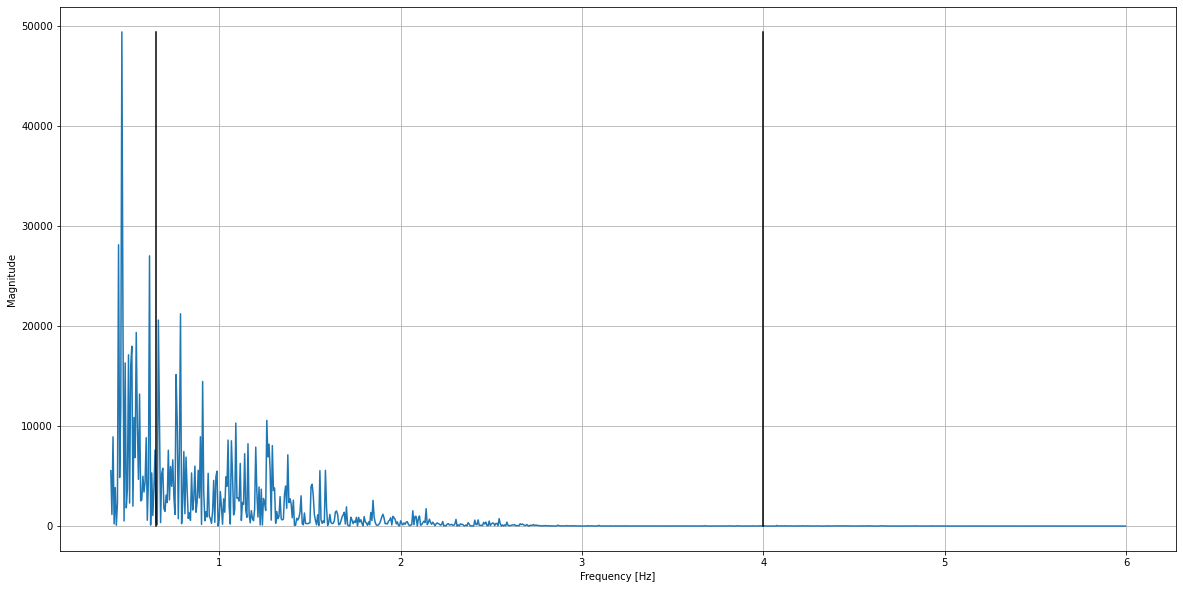

Mean Absolute Error: 43.81608584176915

##################### RESULTS #####################
Mean Absolute Error: 25.17250348809294
Pearson Correlation: -0.11362570715813336


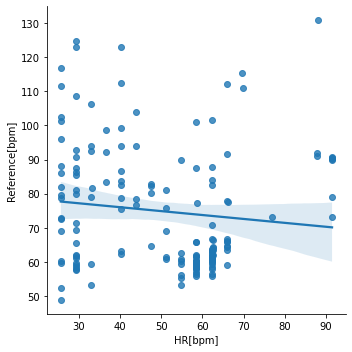

In [22]:
evaluate(
    lowpass_filter=True,
    n_points=9,
)